<a href="https://colab.research.google.com/github/nguyenthinhthanh/The-Queuing-Systems-based-Performance-Evaluation-Project/blob/main/HK151_SPE_Phoenix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulation of Multiple Feedback Queues in CPU Scheduling

---

## Table of Contents
- [1. Team work declaration](#1-team-work-declaration)
- [2. Introduction](#2-introduction)
  - [2.1 Overview](#21-overview)
  - [2.2 Objective](#22-objective)
- [3. Theoretical Background](#3-theoretical-background)
  - [3.1 Single Queuing System](#31-single-queuing-system)
  - [3.2 Multiple-Queuing System](#32-multiple-queuing-system)
- [4. System Design](#4-system-design)
  - [4.1 State goals and the System define](#41-state-goals-and-define-the-system)
  - [4.2 Services and Outcomes](#42-services-and-outcomes)
  - [4.3 Select Metrics](#43-select-metrics)
  - [4.4 List System Parameters](#44-list-system-parameters)
  - [4.5. List Factors to Study](#45-list-factors-to-study)
  - [4.6. Evaluation Technique](#46-evaluation-technique)
    - [4.6.1 Mapping the Input Data and System Parameters](#81-mapping-the-input-data-and-system-parameters)
    - [4.6.2 Mapping the Output Simulation Measurement and Mathematical Formula Calculation](#462-mapping-the-output-simulation-measurement-and-mathematical-formula-calculation)
  - [4.7 Select Workload](#47-select-workload)
- [5 System architecture](#463-system-architecture)
- [6. System Implementation](#5-system-implementation)
  - [6.1 Flow of the Simulation Program](#51-flow-of-the-simulation-program)
  - [6.2 Implementation](#52-implementation)
- [7. Experiment Design](#7-experiment-design)
- [8. Present results](#8-present-results)
- [9. Conclusions](#7-conclusions)
- [10. References](#8-references)

# 1. Team work Declaration

## Team

| **No.** | **Student ID** | **Full Name** |
|:-------:|:--------------:|---------------|
| **1** | 2213682 | Hà Chí Trung |
| **2** | 2213278 | Lê Lộc Quốc Thịnh |
| **3** | 2213140 | Nguyễn Thịnh Thành |
| **4** | 2213467 | Nguyễn Văn Tiến |
| **5** | 2210284 | Trịnh Quốc Bảo |
| **6** | 2213561 | Trịnh Thu Trang |
| **7** | 2212761 | Võ Huy Quang |
| **8** | 2014882 | Nguyễn Hải Trung |

## Workmap declaration

| Full Name              | Student ID | Design Role | Dev Role | Eval Role | Report Role | Ass work description | Rating | week 2 outcome | week 3 outcome | week 4 outcome |
|------------------------|------------|-------------|----------|-----------|-------------|--------------------------------------------|--------|----------------|----------------|-----------------|
| Hà Chí Trung           | 2213682    | yes/no      | yes/no   | yes/no    | yes/no      | Platoon 1                                  | A      |                |                |                 |
| Lê Lộc Quốc Thịnh      | 2213278    | yes      | yes   | yes    | yes      | Platoon 3                                  | A      |                |                |                 |
| Nguyễn Thịnh Thành     | 2213140    | yes      | yes   | no    | yes      | Platoon 1                                  | A      |                |                |                 |
| Nguyễn Văn Tiến        | 2213467    | yes/no      | yes/no   | yes/no    | yes/no      | Platoon 1                                  | A      |                |                |                 |
| Trịnh Quốc Bảo         | 2210284    | no      | no   | yes    | yes      | Platoon 3                                  | A      |                |                |                 |
| Trịnh Thu Trang        | 2213561    | yes/no      | yes/no   | yes/no    | yes/no      | Platoon 2                                  | A      |                |                |                 |
| Võ Huy Quang           | 2212761    | no      | yes   | yes    | yes      | Platoon 3                                  | A      |                |                |                 |
| Nguyễn Hải Trung       | 2014882    | yes/no      | yes/no   | yes/no    | yes/no      | Platoon 2                                  | A      |                |                |                 |



# 2. Introduction

## 2.1 Overview

Resource scheduling is a fundamental function in modern multitasking computer systems, directly influencing application performance and user exerience. This project addresses the challenge of designing and evaluating an application enviroment where tasks are distributed across a **network of mutiple processing modules**. Specifically, the system models an application architecture composed of three interconnected modules, where each module independently manages its task queue using **Multi-Level Feedback queue scheduler(MLFQ)** scheduler.

Each module is a single queue, so the overall system, therefore, is structured as a **Multiple-queueing network**. This architecture features external task arrivals and internal routing, where tasks not only transition between priority level queues but also go through the three separate modules to complete their path.

## 2.2 Objective

The primary objectives of this performance evaluation project is to systematically model, implement, and analyze the performance trade-offs inherent in a **complex, distributed** application scheduling architecture.

1. **Modeling and implementation**: To construct a discrete-event simulation model of the Mutiple-Queueing Network system. This involves implementing the three interconnected application modules, each featuring its own **Multi-Level Feedback Queue (MLFQ)**.

2. **End to end Performance Quantification**: To measure and quantify the system's end-to-end performance, focusing on the overall metrics identified by step 3 in **step in PE project** across the entire network as well as isolated components.

3. **Cross-Module Analysis and Botteneck Identification**: To analyze the impact of inter-module routing and load contention on application performance. This includes identifying the most heavily utilized module or secific MLFQ level that acts as the network's primary bottleneck.

4. **Policy Optimization insight**: To derive key insight into how the choice of MLFQ parameters (quantum size, demotion and promotion policies) within individual modules affects not only local efficiency, but global fairness and performance as well.

## 3. Theoretical Background

### 3.1 Single-queueing system

A queue is a waiting line, and queueing system are encountered almost everywhere including checkout counters in grocery stores and people waiting for service at banks, post offices, movie theaters, and cafeterias. A queueing system consists of one or more servers who attend to customers that arrive according to a **well-defined stochastic process**.

Basically, a queueing-system is defined as a service facility where units, referred to as **"customer"**, arrive for service, and a queue is used when the number of customers exceeds the service capacity. The system is characterized by the input process, queue discipline, and service mechanism, which together determine how customers are served and how waiting occurs

<br>
<center>
<img src='https://drive.google.com/uc?export=view&id=1yL20qNzcPlnoSfIDUmJKipuctVG8y3oX'width="60%" height="80%" />
<figcaption>Image 2.1: <a href="https://www.geeksforgeeks.org/maths/queuing-theory/"> An example of the queue system</a></figcaption>
</center>
<br>

A queueing system is described using Kendall's notation: A/ B/ m/ K/ n/ D, where
> A: distribution function of the interarival times,

> B: distribution function of the service times,

> m: number of server,

> K: capacity of the system, the maximum number of customers in the system including the one being serviced,

> n: population size, number of sources of customers,

> D: service discipline.

### 3.2 Multiple-queueing system

**A multiple-queueing system**, simply, includes 2 or many single-queueing systems connected together serially, parallelly, or to form a network.

Types of multiple queueing systems:

> Multi-server system (single queue): Customers form a single line and are served by the first available server. This is common in systems like a bank with a virtual single line feeding multiple tellers.


> Multiple queues, multiple servers: Each server has its own separate queue, and customers choose which line to join. Examples include a grocery store with individual checkout lines.

> Multi-stage queueing system: Customers are served in a sequence of steps, requiring service from multiple stations or servers in a network.

**A network-queueing system**, a specific case of multiple-queueing system, is a model that is used for characterizing the interconnected queues and servers where customers arrive, wait for service and then move between the queue systems (single-queueing system).


# 4. System Design

## 4.1 State goals and the System define


**State goals**

The goal of this project is to conduct a validatable performance analysis of a distributed application scheduling architecture, specifically to quantify the ability to respond immediately to the interactive task from the customer.

**Define the system**

1. **System boundary and scope**

> Boundary: The system boundary encompasses the entire path from **external task arrival (source)** into any module through the interconnected execution modules.

> Scope: The focus is strictly on internal resource contention and the impact of the scheduling discipline  to the application. External processes, such as the operating system kernel or the network stack beyond the application layer, are excluded from the boundary.

2. **System components**

> The system consists of 3 interconnected application modules, each of them functions as an independent single-queueing system but sharing workload via defined routing probabilities.

**Module configuration**

Each module complies with the M/M/c base model,has a finite size of queue capacity and incorporates MLFQ scheduling for service discipline accroding to Kendall's notation.

> A: Inter-arrival times follow an exponential distribution.

> B: Service time follow an exponential distribution.

> K: The capacity of the queue is infinity.

> N: The population size is fintite.

> m: The number of CPU cores = c, c > 1 (Multiserver).

> D: Service discipline follow the MLFQ scheduling.

**Network structure (Mutiple-queueing system)**

The modules are linked via stochastic routing. When the service is completed, it either transitions to another module or exits to the Sink.

> Render Module: Graphic processing.

> AI Module: Game Logic/ Decision

> Sound Module: Audio/ Event Handling



## 4.2 Service and Outcomes

In this simulation, the **system boundary** is defined as the entire processing system, which includes all internal modules. By defining the boundary at the system level, we treat the whole simulation as a single service that processes external requests. This perspective simplifies the evaluation model and focuses on the system’s overall performance rather than the internal interactions between modules.

### 4.2.1 System Service

**Description:**
The system provides one primary **service**: executing and completing an incoming external task. Each task represents a unit of work submitted from outside the system (e.g., a frame request or gameplay update). The system’s internal scheduler manages the task’s execution across available CPU cores and internal modules according to the multi-level feedback queue (MLFQ) scheduling policy.

This service encapsulates all module-level behaviors into a single abstraction: the system accepts a job, processes it internally, and produces an outcome observable at the system boundary.

**Key assumptions:**

* The queue capacity may be **limited**, meaning some incoming tasks could be rejected when the system is overloaded.
* The system runs long enough to reach steady-state behavior.
* Each job entering the system either completes or remains uncompleted within the simulation time.

### 4.2.2 Outcomes

Given the defined boundary, each job processed by the system can result in one of the following **two outcomes**:

1. **Done (Completed Correctly):**
   The task is accepted by the system, fully processed, and exits successfully. This represents a correctly completed request.

2. **Not Done (Rejected or Uncompleted):**

   * The task is rejected upon arrival due to limited system capacity (queue full).
   * The task enters the system but is not completed within the observation window (e.g., still waiting or processing when the simulation ends).
   * There are no cases of “done incorrectly” under the system definition.

### 4.2.3 Discussion

Defining the system with a single external service ensures clarity in measurement and simplifies validation with analytical models. Since the boundary includes all internal components, only global performance indicators such as **throughput**, **response time**, and **rejection rate** are relevant.

This definition also aligns with the theoretical requirements for validating the model using queueing theory equations. Any additional assumptions (such as finite capacity or steady-state conditions) must be explicitly stated, as they influence the mathematical validation step.

## 4.3 Select Metrics

To evaluate the performance of the game simulation system, a set of key **performance metrics** is defined. These metrics are used to measure how effectively each service (Render, AI, and Sound) operates under different workloads and to compare simulation results with analytical models. The metrics are derived from both system-level and module-level observations.

### 4.3.1 System-Level Metrics

| **Metric**                | **Formula**                             | **Description**                                        |
| ------------------------- | --------------------------------------- | ------------------------------------------------------ |
| **Throughput**            | `X = completed_jobs / simulation_time`  | Number of completed tasks per unit of time.            |
| **Average Response Time** | `E[r] = completion_time - arrival_time` | Measures the average time a job spends in the system.  |
| **CPU Utilization**       | `ρ = λ / (m × μ)`                       | Fraction of time that all CPU cores are busy.          |
| **Fairness Index**        | `J = (Σrᵢ)² / (n × Σrᵢ²)`               | Indicates the fairness among jobs in different queues. |
| **Dropped Jobs**          | `D = dropped / generated`               | Ratio of jobs dropped due to overload or queue limits. |


### 4.3.2 Module-Level Metrics

| **Metric**               | **Formula**                                | **Description**                                                |
| ------------------------ | ------------------------------------------ | -------------------------------------------------------------- |
| **Queue Length**         | `E[n_q] = mean(queue_size)`                | Average number of jobs waiting in each queue.                  |
| **Average Waiting Time** | `E[w] = E[r] - (1 / μ)`                    | Time a job spends waiting before service starts.               |
| **Service Time**         | `E[s] = 1 / μ`                             | Average CPU time required per completed job.                   |
| **Context Switch Count** | `CS = number_of_preemptions`               | Number of times jobs are preempted or switched between queues. |
| **Demotion Rate**        | `D_r = demoted_jobs / total_serviced_jobs` | Percentage of jobs moved to a lower-priority queue.            |


### 4.3.3 Measurement and Validation

* All metrics are collected through event logs generated by the SimPy simulation environment.
* Results are averaged across multiple workloads (light, medium, and heavy).
* Analytical validation is conducted using M/M/c queueing models and **Little’s Law** `E[n] = λ × E[r]` to ensure simulation consistency.
* Key performance indicators such as throughput and response time are compared across services to evaluate balance and efficiency.

## 4.4 List System Parameters

The parameters define the configuration of each MLFQ module and the overall multiple-queueing network system. These parameters are used both in analytical modeling and in simulation execution.

| **Parameter** | **Symbol** | **Description** | **Typical Value(s)** |
|:--------------|:-----------:|:----------------|:--------------------:|
| **Arrival rate** | $\lambda$ | Average rate at which jobs arrive to each module (jobs/time unit). | 0.5 – 2.0 |
| **Service rate** | $\mu$ | Average rate at which a CPU core can complete jobs (jobs/time unit). | 1.0 |
| **Number of servers (CPU cores)** | $m$ | Parallel service units available per module. | 1, 2, 4 |
| **Number of feedback levels** | $L$ | Number of queues in the Multi-Level Feedback Queue. | 3 |
| **Time quantum per level** | $Q$ | CPU time slice assigned for each priority level. | [8, 16, 32] ms |
| **System capacity** | $K$ | Maximum number of tasks that can be in the system simultaneously. | $\infty$ or 100 |
| **Simulation time** | $T$ | Total simulated duration for each experiment. | 10,000 time units |
| **Routing matrix** | $P_{routing}$ | Probability matrix defining how jobs move among modules. | e.g. Render$\to$AI: 0.3, AI$\to$Sound: 0.4 |
| **Entry Probability** | $P_{entry}$ | Probability distribution determining the initial module for external arrivals. | Balanced: {Render:0.33, AI:0.33, Sound:0.33} |
| **Random seed** | $s$ | Used for reproducibility of random distributions. | 42 |

**Remarks:**
- Arrival and service times follow **exponential distributions**.
- Each module (Render, AI, Sound) uses independent MLFQ configurations but shares the same event environment.
- The routing matrix ensures that jobs can circulate among modules before leaving the system.
- Parameters are adjustable to support different workload scenarios (light, medium, heavy load).


## 4.5 List Factors to Study

The simulation experiments investigate how key configuration parameters affect system performance and fairness across the multi-module MLFQ system.  

| **Factor** | **Variation** | **Performance Metrics Observed** | **Purpose** |
|:------------|:--------------|:----------------------------------|:-------------|
| **Workload intensity ($\lambda$)** | Light ($\lambda = 0.5\mu$), Medium ($\lambda = 0.8\mu$), Heavy ($\lambda = 1.2\mu$) | Throughput, Response Time, Drop Rate | Study system saturation and bottleneck behavior. |
| **Quantum size policy** | $Q = [8,16,32]$ vs $[4,8,16]$ | Response Time, Context Switch Count, Fairness | Evaluate how scheduling aggressiveness affects delay and overhead. |
| **Number of CPU cores ($m$)** | 1, 2, 4 | CPU Utilization, Throughput | Measure scalability with additional processing units. |
| **Routing probability ($P_{routing}$)** | Different routing matrices (balanced vs biased to one module) | Module Utilization, Waiting Time | Identify inter-module congestion and fairness. |
| **Entry Probability ($P_{entry}$)** | Balanced Entry (distributed across all modules) vs Skewed Entry (focused on a single module like Render). | Fairness Index, Throughput | Evaluate the system's ability to handle uneven external load distribution and identify potential bottlenecks at entry points. |
| **Queue capacity ($K$)** | Finite ($K=100$) vs Infinite | Drop Rate, Waiting Time | Observe behavior under limited buffer conditions. |

**Workload types:**
1. **Light load:** few arrivals, system mostly idle.  
2. **Medium load:** balanced arrival and service rates.  
3. **Heavy load:** arrivals exceed service capacity, leading to congestion and queue growth.

## 4.6 Evaluation Technique

We use **simulation** as the main evaluation method to analyze the performance of the **Multi-Level Feedback Queue (MLFQ)** system in the CPU scheduling problem. The reason for choosing simulation is that MLFQ exhibits **nonlinear behavior** such as preemption, demotion, and multiple priority levels, along with **routing between modules** (a network of MLFQ nodes), which makes purely analytical approaches **inaccurate or infeasible**.  

The simulation is implemented using **SimPy**, allowing control over **workload intensity**, **time quantum policies**, and the **topology between sub-modules**.


### 4.6.1 Mapping the input data and system parameters to the associated queuing system

Below show how the input workload characteristics and system configuration parameters are mapped to their corresponding elements in the queuing model representation of the MLFQ scheduling system.

**Arrival process**
- **Real:** Arrival speed of the process/jobs submitted to the CPU.  
- **Model (A):** The arrival process is assumed to be a **Poisson process** with rate **λ (lambda)**, representing the **average number of processes arriving per unit time**. Each process is generated randomly, with the **inter-arrival time** following an **Exponential distribution**.

      A = M (Poisson arrivals)

**Service process**
- **Real:** Average service speed of the CPU, service time required by a job. In MLFQ, each process can be preempted or demoted between different queue levels, which changes the actual service time, but still ensures that the service rate follows an exponential distribution.
- **Model (B):** The **service time** of each process is modeled by an **Exponential distribution** with a mean of `1/μ`, where **μ (mu)** represents the **service rate of the CPU (jobs per time unit)**.

      B = M (Exponential service time)

**Servers / CPU cores**
- **Real:** Number of CPU cores available to serve jobs. A CPU system can consist of one or multiple parallel processing cores, each independently serving the processes ready in the MLFQ queue.
- **Model:** Parameter **m** in `A/B/m` → number of servers.  
- **Examples:**  
  - Single-core system → `m = 1`  
  - Multi-core system → `m = number_of_cores`

**Queue capacity**
- **Real:** Maximum number of jobs that can wait in the queue. The MLFQ queue stores processes waiting for the CPU. In practice, the queue may be limited by memory resources or the operating system's policy. If the queue is full, new processes will be rejected or dropped.  
- **Model:** **K** in `A/B/m/K`.  
  - Unbounded queue → `K = ∞`  
  - Simulator representation → `K = None` or `0`

**Routing / Internal Scheduling**
- **Real:** After a process is served at a module, it may move to another module (**AI**, **Render**, **Sound**), or **leave the system**.

- **Model:** A **routing matrix (P)** is used to represent the **transition probabilities** between modules or queue levels:

      `P = [p_ij]`, where `p_ij = P(job moves from module i to module j)`

The total probability for each row *i* satisfies:  `Σ_j p_ij ≤ 1`. If `Σ_j p_ij < 1`, the remaining probability represents the chance that the process **leaves the system**.


### 4.6.2 Mapping the output simulation measurement and mathematical formula calculation
Below is presents the correspondence between the **measured performance metrics** obtained from the MLFQ simulation and the **analytical parameters** derived from the M/M/m queueing theory model. The mapping table bridges the gap between the **MLFQ simulation results** and the **theoretical M/M/m queueing model**, ensuring that every measured parameter has a clear analytical counterpart for performance analysis and validation.

**A. Effective Arrival Rate (λ_eff) — Network Routing Mapping**

In the queueing network, each module (Render, AI, Sound, etc.) receives both **external arrivals (γ)** and **routed arrivals** from other modules.  

The analytical effective arrival rate for each module is computed from:

      λ_eff = γ + Pᵀ · λ_eff ⇒ (I - Pᵀ) · λ_eff = γ ⇒ λ_eff = (I - Pᵀ)⁻¹ · γ

**In simulation:** `λ̂ = served_cpu / sim_time`. Where `served_cpu` is the number of jobs completed by the module.

**Comparison:** Analytical `λ_eff` ≈ Simulated `λ̂` if the system is **stable** and **routing probabilities are consistent**.

**B. M/M/m-Level Mapping**

The table below provides a mapping between **analytical M/M/m model metrics** and their **simulation counterparts**.

It shows how each theoretical parameter (Symbol and Formula) corresponds to the variables used in code and the equivalent measurements obtained from simulation results.

| Symbol | Mathematical Definition | Code Variable | Simulation Equivalent | Simulation Output |
|:-------|:-------------------------|:---------------|:----------------------|:----------------------|
| **ρ** | `λ / (m * μ)` - CPU utilization | `rho` | `cpu_util = cpu_busy_time / (m * sim_time)` | CPU Utilization |
| **Lq**| `(Pw * ρ) / (1 - ρ)` - average number waiting | `L_q` | `avg_number_in_queue = λ̂ * Wq̂` | Average number jobs waiting in queue |
| **L** | `L_q + (λ / μ)` - total jobs in system | `L` | `avg_number_in_system` | Average number jobs in system |
| **Wq** | `L_q / λ` - mean waiting time | `Wq` | `avg_wait_per_job` | Average waiting time |
| **W** | `W_q + 1/μ` - mean response time | `W` | `avg_turnaround` | Average Turnaround time |
| **1/μ** | Mean service time | `service_time` | `cpu_service_mean` | Average Service time |

**C. Network-Level Mapping**

    `L_total = Σ_i L_i`, `Γ_total = Σ_i γ_i`, `W_net = L_total / Γ_total`

- **Analytical meaning:**  
  `W_net` is the expected *end-to-end response time* across all modules (by **Little’s Law**).

- **Simulation counterpart:**  
  `Ŵ_net = (1/N) * Σ(exit_time - arrival_time)`  
computed as `avg_end2end`.

Mapping summary:

| Analytical | Equation | Simulation Output |
|:------------|:----------|:------------------|
| **L_total** | `Σ_i L_i` | Sum of `avg_number_in_system` |
| **Γ_total** | `Σ_i γ_i` | Sum of external arrival rates |
| **W_net** | `L_total / Γ_total` | `avg_end2end` |


## 4.7 Select Workload
At least two workload types are selected to test simulation models:
- Light load
- Heavy load


# 5. System architecture
The simulation system models a CPU scheduling environment based on the Multi-Level Feedback Queue (MLFQ) algorithm. Each MLFQ instance functions as an independent scheduler that manages a set of processes or threads, which can belong to either a complete application or a specific sub-module (e.g., rendering, AI logic).  

<br>
<center>
<img src="https://drive.google.com/uc?export=view&id=1HXs1tYlPAmAZ6mzF-lV3OLis5g9CiKC5" width="90%" height="90%">
<figcaption>Figure 1: System Overview</figcaption>
</center>
<br>

At the top level, the Operating System acts as a global scheduler that manages multiple CPU cores. Each core executes a thread belonging to the Game Engine Process, which consists of three main modules: Rendering, AI and Sound.

Each module maintains its own Multi-Level Feedback Queue (MLFQ) scheduler to manage internal jobs and prioritize tasks dynamically based on their execution behavior. The parameters λ (arrival rate), μ (service rate), and c (number of cores/servers) define the performance characteristics of each module.

The interconnection between modules (e.g., AI → Render → Physics) represents the flow of jobs through the system, forming a network of MLFQ schedulers that together model the overall game engine workload.

# 6. System Implementation



## 6.1 Flow of the Simulation Program  

**Main Flow:**  
`Initialize → Generate Jobs → Queue & Schedule → Serve → Route/Complete → Collect Data → Output Results`  

1. **Initialization**  
   - Load configuration (λ, μ, c, routing matrix).  
   - Create MLFQ modules (Rendering, Physics, AI, etc.).  
   - Set simulation clock to 0.

2. **Job Arrival**  
   - Jobs arrive following a Poisson process (rate λ).  
   - Each job is timestamped and routed to its target module.

3. **Queueing & Scheduling**  
   - Jobs start in the highest-priority queue.  
   - Scheduler assigns jobs to available CPU cores.  
   - If a job exceeds its time quantum `q_i`, it is demoted to the next level.

4. **Service Execution**  
   - Each active job consumes service time at rate μ.  
   - When complete, the job either exits or is routed to another module.

5. **Data Collection**  
   - Track CPU utilization, queue length, waiting time, and turnaround time.  
   - Store metrics per module for analysis.

6. **Termination & Output**  
   - Stop when simulation time or job count limit is reached.  
   - Compute and compare analytical vs. simulated metrics.  
   - Export results for visualization or reporting.


## 6.2 Implement

In [ ]:
!pip install simpy

Required Libraries and Dependencies


In [ ]:
# @title
# mlfq_sim.py
# Multi-Level Feedback Queue simulation (SimPy)
# Paste into a Jupyter cell and run. Requires simpy installed.

import simpy
import random
import statistics
import math
import numpy as np
from collections import deque, defaultdict, namedtuple
import pandas as pd
import matplotlib.pyplot as plt
import concurrent.futures
from typing import List, Optional, Tuple
from matplotlib.lines import Line2D
import math


Queue simulation mode

In [ ]:
# @title
# Queue simulation mode
SINGLE_QUEUE_MODE = 0
NETWORK_QUEUE_MODE = 1
# Defaut simulations mode
QUEUE_SIMULATION_MODE = NETWORK_QUEUE_MODE

### Statistical function: compute 95% CI
**Purpose:** Compute sample mean and approximate 95% confidence interval (uses z ≈ 1.96). Calculates sample standard deviation, standard error, and `z * SE`.


In [ ]:
# @title
# ----------------------
# Helper: Confidence Interval (95%)
# ----------------------
def mean_ci_95(data):
    n = len(data)
    if n == 0:
        return (None, None, None)
    mean = statistics.mean(data)
    if n == 1:
        return (mean, mean, mean)
    stdev = statistics.stdev(data)
    # t critical for 95% ~ 1.96 approx for large n, use t_approx = 1.96
    z = 1.96
    se = stdev / math.sqrt(n)
    return (mean, mean - z*se, mean + z*se)

## Analytical function: compute M/M/m performance metrics


In [ ]:
# @title
# ----------------------
# Analytical baseline: M/M/m formulas
# ----------------------
def MMm_metrics(arrival_rate, service_rate, m):
    """Compute analytical M/M/m performance metrics"""
    # Traffic intensity = Cpu utilization (rh0)
    rho = arrival_rate / (m * service_rate)
    if rho >= 1:
        return None  # unstable

    # Probability of zero job in the system (p0)
    sum_terms = sum(((m * rho)**k) / math.factorial(k) for k in range(m))
    p0 = 1.0 / (sum_terms + ((m * rho)**m) / (math.factorial(m) * (1 - rho)))

    # Probability that an arriving job must wait for service (Pw)
    pw = ((m * rho)**m / (math.factorial(m) * (1 - rho))) * p0

    # Throughput (λ_eff)
    lam_eff = arrival_rate

    # Average Service Time (1/μ)
    service_time = 1.0 / service_rate

    # Average Number of Jobs in Queue (Lq)
    Lq = (pw * rho) / (1 - rho)

    # Average Number of Jobs in System (L)
    L = Lq + (arrival_rate / service_rate)

    # Average Waiting Time in Queue (Wq)
    Wq = Lq / arrival_rate

    # Average Response Time = Average Turnaround Time (W)
    # because no I/O Blocked
    W = Wq + 1.0 / service_rate

    return {
        'rho': rho,                     # Traffic intensity = Cpu utilization (rh0)
        'P0': p0,
        'Pw': pw,
        'Lq': Lq,
        'L': L,
        'Wq': Wq,                       # Average Waiting Time in Queue (Wq)
        'W': W,                         # Average Response Time = Average Turnaround Time (W)
        'lam_eff': lam_eff,             # Throughput (λ_eff)
        'service_time': service_time,   # Average service time (1/μ)
    }

## Task Class: Job Representation for Scheduling Simulation

In [ ]:
# @title
# ----------------------
# Task object
# ----------------------
# Each Task object stores information about a specific job:
# - tid: unique identifier of the task
# - arrival_time: time when the task enters the system
# - remaining: remaining service time for the task
# - total_service: total required service time
# - level: priority level or queue level in multi-level scheduling
# - last_enqueue_time: last time the task was added to the queue
# - visits: number of times the task has been processed
# - cancelled: flag indicating whether the task has been cancelled
class Task:
    __slots__ = ('tid','arrival_time','remaining','total_service','level','last_enqueue_time','visits','cancelled')
    def __init__(self, tid, arrival_time, total_service):
        self.tid = tid
        self.arrival_time = arrival_time
        self.remaining = total_service
        self.total_service = total_service
        self.level = 0
        self.last_enqueue_time = arrival_time
        self.visits = 0
        self.cancelled = False  # for signal/cancel management

## Queuing Node - MLFQSystem Class for Multi-Level Feedback Queue Scheduler Simulation

In [ ]:
# @title
# ----------------------
# MLFQ System
# ----------------------
# This class implements a Multi-Level Feedback Queue (MLFQ) scheduler
# simulation using SimPy. It models task arrivals, CPU core allocation,
# preemptive CPU slices, task demotion across levels, and basic statistics
# collection such as waiting time, turnaround time, and CPU utilization.
# Tasks can be cancelled mid-execution, and the system supports multiple
# feedback levels, CPU cores, and configurable time quantums.
class MLFQSystem:
    def __init__(self,
                 name,                  # module name
                 env,                   # share env from netword
                 arrival_rate,          # lambda
                 service_rate,          # mu for CPU total work distribution
                 cpu_cores=1,           # number of CPU cores
                 num_levels=3,          # number of feedback levels
                 quantums=None,         # list of quantums per level (time units)
                 max_system_size=None,  # K total capacity (including in service + in queues + IO)
                 sim_time=10000,
                 seed=None):
        """
        name: module id
        env: shared simpy.Environment
        """
        self.name = name
        self.env = env
        self.arrival_rate = arrival_rate
        self.service_rate = service_rate
        self.cpu_cores = cpu_cores
        self.num_levels = num_levels
        if quantums is None:
            # default: level0 small quantum, then double
            self.quantums = [1.0 * (2**i) for i in range(num_levels)]
        else:
            self.quantums = quantums
        self.max_system_size = max_system_size
        self.sim_time = sim_time
        self.seed = seed

        # keep reference to network router will be set later
        # should be set by NetworkSimulator
        self.router = None

        # runtime vars
        self.cpu_store = None     # available core ids
        self.ready_queues = [ deque() for _ in range(self.num_levels) ]  # deque per level
        self.task_counter = 0

        # stats
        self.generated = 0
        self.served = 0
        self.dropped = 0
        self.completed_tasks = []
        self.wait_times_per_level = defaultdict(list)
        self.turnaround_times = []
        self.cpu_busy_time = 0.0
        self.cpu_service_times = []

        # trace/dup detection
        self.active_tasks = {}  # tid -> Task

    # ---------- utility ----------
    def current_total_in_system(self):
        """Count tasks in ready queues + cpu busy + io queue + io busy"""
        in_ready = sum(len(q) for q in self.ready_queues)
        cpu_busy = self.cpu_cores - len(self.cpu_store.items) if self.cpu_store is not None else 0
        return in_ready + cpu_busy

    # ---------- initialization ----------
    def init(self):
        # available CPU cores / IO servers
        self.cpu_store = simpy.Store(self.env, capacity=self.cpu_cores)
        for cid in range(self.cpu_cores):
            self.cpu_store.put(cid)
        # schedule processes
        self.env.process(self.arrival_generator())
        self.env.process(self.dispatcher())        # assign CPU cores to tasks
        # IO handler is invoked on demand (we spawn io_process for each IO-start)
        # optional background monitor for diagnostics could be here

    # ---------- arrival generator ----------
    def arrival_generator(self):
        while self.env.now < self.sim_time:
            inter = random.expovariate(self.arrival_rate)
            yield self.env.timeout(inter)
            self.handle_arrival()

    def handle_arrival(self):
        t = self.env.now
        self.task_counter += 1
        self.router.global_task_counter += 1
        tid = self.task_counter
        # sample total service requirement (Exp with mean 1/mu)
        total_service = random.expovariate(self.service_rate)
        task = Task(tid, t, total_service)
        # check max system size K
        if (self.max_system_size is not None) and (self.current_total_in_system() >= self.max_system_size):
            self.dropped += 1
            # we may log duplicate/drop signal; return
            return
        # accept task: push to level 0 queue
        task.last_enqueue_time = t
        task.level = 0
        self.ready_queues[0].append(task)
        self.generated += 1
        self.active_tasks[tid] = task

    # ---------- dispatcher ----------
    def dispatcher(self):
        """Continuously check for idle CPU cores and non-empty highest-level ready queue.
           When both available, start a cpu slice process for that task.
        """
        while self.env.now < self.sim_time:
            # if no tasks ready, wait a tiny bit
            if all(len(q)==0 for q in self.ready_queues):
                # no pending tasks; avoid busy-loop
                yield self.env.timeout(0.001)
                continue
            # if no core free, wait until one becomes free (or small timeout)
            if len(self.cpu_store.items) == 0:
                # wait small time to yield to cpu release events
                yield self.env.timeout(0.0005)
                continue
            # pick highest priority non-empty queue
            for lvl in range(self.num_levels):
                if len(self.ready_queues[lvl])>0:
                    task = self.ready_queues[lvl].popleft()
                    # record waiting time at this level
                    wait = self.env.now - task.last_enqueue_time
                    self.wait_times_per_level[lvl].append(wait)
                    # get a cpu core (non-blocking because we've checked cpu_store not empty)
                    core_id = yield self.cpu_store.get()
                    # spawn CPU slice process
                    self.env.process(self._cpu_slice(core_id, task, lvl))
                    break
            # small yield to allow other events
            yield self.env.timeout(0)

    # ---------- CPU slice ----------
    def _cpu_slice(self, core_id, task, lvl):
        """Process a task on core for a time slice = min(remaining, quantum[lvl])"""
        start = self.env.now
        quantum = self.quantums[lvl]
        slice_time = min(task.remaining, quantum)
        if slice_time < 0:
            slice_time = 0.0
        # "beginService" bookkeeping
        task.visits += 1
        # we count CPU busy time
        # we'll add to cpu_busy_time when service finishes (to support preemption / partial)
        # do the CPU slice
        if slice_time > 0:
            yield self.env.timeout(slice_time)
        elapsed = self.env.now - start
        task.remaining -= elapsed
        self.cpu_busy_time += elapsed
        self.cpu_service_times.append(elapsed)
        # endService: release core and perform routing
        # return core id
        yield self.cpu_store.put(core_id)
        # decide next: finished? go to IO? or demote and requeue
        if task.cancelled:
            # signal-based cancellation: remove from active tasks
            self.active_tasks.pop(task.tid, None)
            return
        if task.remaining <= 1e-12:
            # finished CPU work
            self.served += 1
            # task truly completed (no IO)
            turnaround = self.env.now - task.arrival_time
            self.turnaround_times.append(turnaround)
            self.completed_tasks.append(task)
            self.active_tasks.pop(task.tid, None)

            if self.router is not None:
                self.router.route_on_completion(task, from_module=self.name)
            return
        else:
            # not finished -> demote
            new_lvl = min(lvl+1, self.num_levels-1)
            task.level = new_lvl
            task.last_enqueue_time = self.env.now
            self.ready_queues[new_lvl].append(task)
            return

    # ---------- signal: cancel a task (intermediate canceling) ----------
    def cancel_task(self, tid):
        """Mark a task cancelled. When process reaches next checks it will remove it."""
        t = self.active_tasks.get(tid)
        if t:
            t.cancelled = True
            return True
        return False

    # ---------- run ----------
    def run(self):
        if self.env is not None:
            self.init()

    # ---------- results ----------
    def results(self):
        res = {}
        res['generated'] = self.generated   # total of task
        res['served_cpu'] = self.served     # total of task finished
        res['dropped'] = self.dropped       # total of task dropped
        res['avg_wait_per_job'] = (sum(sum(ws) for ws in self.wait_times_per_level.values()) / self.served) if self.served > 0 else 0.0
        res['avg_turnaround'] = statistics.mean(self.turnaround_times) if self.turnaround_times else 0.0 # Average turnaround time
        res['cpu_util'] = (self.cpu_busy_time / (self.cpu_cores * self.sim_time)) if self.sim_time>0 else 0.0
        res['cpu_service_mean'] = (sum(self.cpu_service_times) / self.served) if self.served > 0 else 0.0

        # --- Little/sample-based Lq estimator (Lq)---
        lam_hat = (self.served / self.sim_time) if self.sim_time > 0 else 0.0   # measured throughput
        Wq_hat = res['avg_wait_per_job']                                        # measured avg waiting time per job
        res['avg_number_in_queue'] = lam_hat * Wq_hat

        # --- System-level Little estimator (L) ---
        mu = (self.service_rate) if self.service_rate > 0 else 0.0
        res['avg_number_in_system'] = res['avg_number_in_queue'] + (lam_hat / mu if mu > 0 else 0.0)

        return res

## Queue Network Simulator


In [ ]:
# @title
# ----------------------
# Network Simulator
# ----------------------
class NetworkSimulator:
    def __init__(self, sim_time=10000, seed=None):
        self.env = simpy.Environment()
        self.modules = {}   # name -> ModuleMLFQ
        self.routing = {}   # name -> list of (next_name, prob) ; next_name None = exit
        self.sim_time = sim_time
        self.seed = seed
        self.global_task_counter = 0
        self.completed_tasks = []   # tasks that exit network
        self.external_generators = {}  # module_name -> arrival_rate for independent arrivals

    def add_module(self, name, arrival_rate, service_rate, cpu_cores, num_levels=3, quantums=None, max_size=None, sim_time = 10000, seed=None):
        mod = MLFQSystem(name, self.env, arrival_rate, service_rate, cpu_cores, num_levels, quantums, max_size, sim_time, seed)
        mod.router = self
        self.modules[name] = mod
        return mod

    def set_routing(self, from_name, routing_list):
        """
        routing_list: list of (to_name_or_None, prob)
        sum(prob) should be <= 1; remainder => exit (None)
        Example: [('Render',0.5), ('Sound',0.2)] means 50%->Render,20%->Sound, 30%->exit
        """
        self.routing[from_name] = routing_list

    def add_external_arrival(self, module_name, arrival_rate):
        """Add an independent Poisson external arrival stream to a module."""
        self.external_generators[module_name] = arrival_rate

    def route_on_completion(self, task, from_module):
        """Called by module when it finishes local service. Decide next hop."""
        rlist = self.routing.get(from_module, [])
        # compute cumulative distribution
        rnd = random.random()
        cum = 0.0
        for to_name, prob in rlist:
            cum += prob
            if rnd < cum:
                # route to to_name (if None means exit)
                if to_name is None:
                    # exit system
                    self.completed_tasks.append((task, self.env.now))
                else:
                    # send to module
                    self.modules[to_name].handle_arrival()
                return
        # if not returned, exit system
        self.completed_tasks.append((task, self.env.now))

    def run(self):
        if self.seed is not None:
            random.seed(self.seed)

        # initialize each module so they register their processes on the shared env
        for name, mod in self.modules.items():
            if hasattr(mod, 'run'):
                mod.run()

        self.env.run(until=self.sim_time)

    def gather_results(self):
        # per-module metrics
        mod_result = {}
        for name, m in self.modules.items():
            mod_result[name] = m.results()
        # end-to-end
        completed = len(self.completed_tasks)
        end_to_end_times = [(t.env_time - t.arrival_time) if False else (exit_time - task.arrival_time) for task, exit_time in self.completed_tasks]
        # above line uses exit_time - gen_time
        et_times = [exit_time - task.arrival_time for task, exit_time in self.completed_tasks]
        avg_number_in_system_net = sum(
            mod_result[name].get('avg_number_in_system', 0.0) for name in mod_result
        )
        overall = {
            'completed': completed,
            'avg_number_in_system_net': avg_number_in_system_net,
            'arrival_rate_net': completed / self.sim_time if self.sim_time > 0 else 0.0,
            'avg_end2end': sum(et_times) / completed if completed > 0 else 0.0
        }
        return {'modules': mod_result, 'overall': overall, 'completed_list': self.completed_tasks}

## System simulations runner

In [ ]:
# @title
# ----------------------
# Runner to perform replications and comparisons
# ----------------------
def run_network_scenario(scenario, reps=10):
    """
    scenario is dict with:
      - sim_time
      - modules: dict name -> {cpu_cores, service_rate, num_levels, quantums, max_size, ext_arrival_rate}
      - routing: dict from_name -> [(to_name, prob), ...]
    """
    summaries = []
    for r in range(reps):
        print(f"--- Start replication: {r} ---")
        sim = NetworkSimulator(sim_time=scenario.get('sim_time',10000), seed=(scenario.get('seed',None) + r) if scenario.get('seed',None) is not None else None)
        # add modules
        for name, cfg in scenario['modules'].items():
            sim.add_module(name,
                           arrival_rate=cfg.get('ext_arrival_rate'),
                           service_rate=cfg.get('service_rate',1.0),
                           cpu_cores=cfg.get('cpu_cores',1),
                           num_levels=cfg.get('num_levels',3),
                           quantums=cfg.get('quantums', None),
                           max_size=cfg.get('max_size', None),
                           sim_time=scenario.get('sim_time',10000),
                           seed=cfg.get('seed',None))
            # external arrivals if present
            if cfg.get('ext_arrival_rate', None) is not None:
                sim.add_external_arrival(name, cfg['ext_arrival_rate'])
        # set routing
        for frm, rlist in scenario.get('routing', {}).items():
            sim.set_routing(frm, rlist)
        # run sim
        sim.run()
        res = sim.gather_results()
        summaries.append(res)
    print()
    # aggregate per-module numeric stats across reps
    agg = {}
    module_names = list(scenario['modules'].keys())
    for name in module_names:
        generated = []
        dropped = []
        throughput = []
        cpu_service_mean = []
        cpu_util = []
        avg_turnaround = []
        avg_wait_per_job = []
        avg_number_in_system = []
        avg_number_in_queue = []
        for s in summaries:
            mm = s['modules'][name]

            generated.append(mm['generated'])
            dropped.append(mm['dropped'])
            lam_eff = mm['served_cpu'] / scenario['sim_time']
            throughput.append(lam_eff)
            cpu_service_mean.append(mm['cpu_service_mean'])
            cpu_util.append(mm['cpu_util']),
            avg_turnaround.append(mm['avg_turnaround']),
            avg_wait_per_job.append(mm['avg_wait_per_job'])
            avg_number_in_queue.append(mm['avg_number_in_queue'])
            avg_number_in_system.append(mm['avg_number_in_system'])

        # helper to compute mean + 95% CI via mean_ci_95 and format missing data
        def statistics_95(samples):
            mean, lo, hi = mean_ci_95(samples)
            return {'mean': mean, '95ci': (lo, hi)}

        agg[name] = {
            'generated': statistics_95(generated),
            'dropped': statistics_95(dropped),
            'throughput': statistics_95(throughput),
            'cpu_service_mean': statistics_95(cpu_service_mean),
            'cpu_util': statistics_95(cpu_util),
            'avg_turnaround': statistics_95(avg_turnaround),
            'avg_wait_per_job': statistics_95(avg_wait_per_job),
            'avg_number_in_queue': statistics_95(avg_number_in_queue),
            'avg_number_in_system': statistics_95(avg_number_in_system)
        }
    # overall end-to-end aggregated
    completed = [s['overall']['completed'] for s in summaries]
    arrival_rate_net = [s['overall']['arrival_rate_net'] for s in summaries]
    avg_number_in_system_net = [s['overall']['avg_number_in_system_net'] for s in summaries]
    avg_e2e = [s['overall']['avg_end2end'] for s in summaries]
    overall = {'arrival_rate_net': statistics_95(arrival_rate_net), 'avg_number_in_system_net': statistics_95(avg_number_in_system_net), 'avg_e2e_mean': statistics_95(avg_e2e)}
    return {'module_agg': agg, 'summaries': summaries, 'overall': overall}

# ----------------------
# Extract scenarios
# ----------------------
def extract_all_modules(scenario):
    """
    Extract the entire module from the scenario.
    """
    modules = {}
    for name, cfg in scenario.get('modules', {}).items():
        workload = {
            'arrival_rate': cfg.get('ext_arrival_rate', 0.0),
            'service_rate': cfg['service_rate'],
            'cpu_cores': cfg.get('cpu_cores', 1),
            'num_levels': cfg.get('num_levels', 3),
            'quantums': cfg.get('quantums', None),
            'max_system_size': cfg.get('max_size', None),
            'sim_time': scenario.get('sim_time', cfg.get('sim_time', 10000)),
            'seed': scenario.get('seed', cfg.get('seed', None))
        }
        modules[name] = workload
    return modules

## Analytical Queue Network – Effective Arrival Rates & Jackson/M/M/c Metrics


In [ ]:
# @title
# ----------------------
# Helper build matrix P^T
# ----------------------
def _build_routing_matrix_T(scenario):
    """
    Build P^T matrix representation as dict-of-dicts where P_T[i][j] = prob from j -> i.
    Returns (names, P_col, gamma_list)
    """
    names = list(scenario['modules'].keys())
    n = len(names)
    name_to_idx = {name:i for i,name in enumerate(names)}
    # gamma (external arrivals)
    gamma = [scenario['modules'][name].get('ext_arrival_rate', 0.0) or 0.0 for name in names]
    # P^T columns: P_col[i] is dict mapping from-column j -> prob from j->i
    P_col = [defaultdict(float) for _ in range(n)]
    routing = scenario.get('routing', {})
    for j, from_name in enumerate(names):
        for to_name, prob in routing.get(from_name, []):
            if to_name is None:
                continue
            if to_name not in name_to_idx:
                # ignore unknown destination
                continue
            i = name_to_idx[to_name]
            P_col[i][j] += prob
    return names, P_col, gamma

# ----------------------
# Effective arrivals rate
# ----------------------
def compute_effective_arrivals(scenario, tol=1e-12, max_iter=10000):
    """
    Compute lambda_eff per module.
    Uses numpy solver if available, otherwise uses fixed-point iteration.
    Returns dict: {module_name: lambda_eff}
    """
    names, P_col, gamma = _build_routing_matrix_T(scenario)
    n = len(names)
    Gamma_total = sum(gamma)
    # Try numpy solve
    A = np.zeros((n,n), dtype=float)
    for i in range(n):
        for j in range(n):
            # P_col[i] gives probs from j->i
            A[i,j] = P_col[i].get(j, 0.0)
    # A currently is P^T; we need (I - P^T) * lam = gamma
    IminusP = np.eye(n) - A
    try:
        lam = np.linalg.solve(IminusP, np.array(gamma, dtype=float))
    except np.linalg.LinAlgError:
        raise RuntimeError("Analytical solver: (I - P^T) singular; routing may never exit.")
    return {names[i]: float(lam[i]) for i in range(n)}

# ----------------------
# Queue network analytical
# ----------------------
def network_analytical_summary(scenario):
    """
    Compute analytical (Jackson/M/M/c) metrics for each module and an overall end-to-end W_net.
    Prints nicely and returns a dict of results.
    """
    # extract gamma total to compute network-level W via Little
    names = list(scenario['modules'].keys())
    gamma = {name: scenario['modules'][name].get('ext_arrival_rate', 0.0) or 0.0 for name in names}
    Gamma_total = sum(gamma.values())
    if Gamma_total <= 0:
        print("Warning: total external arrival rate is zero. Nothing to analyze.")
        return {}

    # 1) compute effective lambdas
    lam_eff = compute_effective_arrivals(scenario)

    # 2) compute per-module M/M/c metrics using mmc_metrics
    per_module = {}
    L_total = 0.0
    for name in names:
        lam = lam_eff.get(name, 0.0)
        cfg = scenario['modules'][name]
        mu = cfg['service_rate']
        c = cfg['cpu_cores']
        metrics = MMm_metrics(lam, mu, c)
        if metrics is None:
            per_module[name] = {'lambda': lam, 'unstable': True}
            print(f"Module {name}: Analytical unstable (rho >= 1) with λ={lam:.6f}, μ={mu}, m={c}")
            continue
        per_module[name] = {'lambda': lam, **metrics}
        L_total += metrics['L']

    # 3) network end-to-end via Little: W_net = L_total / Gamma_total
    W_net = L_total / Gamma_total if Gamma_total>0 else None

    # 4) print nicely
    for name in names:
        info = per_module.get(name)
        if info is None:
            print(f"{name}: no data")
            continue
        if info.get('unstable', False):
            print(f"{name}: unstable analytical (rho >= 1). λ_eff={info['lambda']:.6f}")
            continue
        lam = info['lam_eff']
        mu = info['service_time'] and (1.0 / info['service_time']) or scenario['modules'][name]['service_rate']
        m = scenario['modules'][name]['cpu_cores']
        print(f"\n{name}:")
        print(f"λ={lam:.3f}, μ={mu:.3f}, m={m}")
        print(f"1. Throughput theoretical (λ_eff)          : {info['lam_eff']:.4f}")
        print(f"2. Average Service time (1/μ)              : {info['service_time']:.4f}")
        print(f"3. CPU Util theoretical (ρ)                : {info['rho']:.4f}")
        print(f"4. Average Turnaround time theoretical (W) : {info['W']:.4f}")
        print(f"5. Average waiting time theoretical (Wq)   : {info['Wq']:.4f}")
        print(f"6. Average number in queue (Lq)            : {info['Lq']:.4f}")
        print(f"7. Average number in system (L)            : {info['L']:.4f}")

    print("\nGame engine network:")
    print(f"1. Total external arrival rate (Γ)          : {Gamma_total:.6f}")
    print(f"2. Total expected jobs in network (L)       : {L_total:.6f}")
    if W_net is not None:
        print(f"3. Average end-to-end response time (W)     : {W_net:.6f}")
    else:
        print("Cannot compute W_net (Gamma_total=0).")

    return {'per_module': per_module, 'L_total': L_total, 'Gamma_total': Gamma_total, 'W_net': W_net}

## System configuration and execution

In [ ]:
# @title
# ----------------------
# Example scenarios
# ----------------------

if __name__ == "__main__":
    ######### Simulations #########
    print(f"Running network queue simulation mode........\n")
    # Network queue sub-module simulation
    # Define scenario with 3 modules: Render, AI, Sound
    scenario = {
        'sim_time': 500,
        'seed': 259,
        'modules': {
            'Render': {'cpu_cores':2, 'service_rate':1.0, 'num_levels':3, 'quantums':[0.5,1.0,2.0], 'max_size': None, 'ext_arrival_rate':0.3},
            'AI':     {'cpu_cores':2, 'service_rate':0.8, 'num_levels':2, 'quantums':[0.5,1.0], 'max_size': None, 'ext_arrival_rate':0.1},
            'Sound':  {'cpu_cores':2, 'service_rate':0.9, 'num_levels':2, 'quantums':[0.5,1.0], 'max_size': None, 'ext_arrival_rate':0.4},
        },
        # Routing: after finishing in a module, it routes to the next with given prob
        # Format: from_module: [(to_module_or_None, prob), ...]
        # remainder probability means exit
        'routing': {
            'Render': [('AI', 0.1), ('Sound', 0.05)],  # 10% -> AI, 5% -> Sound, else exit
            'AI': [('Render', 0.2)],                   # 20% -> Render, else exit
            'Sound': []                                # no explicit routes => exit
        }
    }

    ######### Light workload #########
    print("Running 5 reps light workload...")
    out = run_network_scenario(scenario, reps=5)
    print("=== Light workload simulation measurement summary ===")
    for name, mm in out['module_agg'].items():
        def fmt(stat, fmt_mean="{:.2f}", fmt_ci="({:.2f}, {:.2f})"):
            if stat is None:
                return "N/A"
            mean = stat.get('mean', None)
            ci = stat.get('95ci', (None, None))
            lo, hi = ci if ci is not None else (None, None)
            if mean is None:
                return "N/A"
            try:
                mean_s = fmt_mean.format(mean)
            except Exception:
                mean_s = str(mean)

            if lo is None or hi is None:
                return f"{mean_s}"
            try:
                ci_s = fmt_ci.format(lo, hi)
            except Exception:
                ci_s = f"({lo}, {hi})"
            return f"{mean_s} ± {ci_s}"

        print(f"{name}:")
        print(f"Total task (mean ± 95%CI)                  : {fmt(mm.get('generated'), '{:.2f}', '({:.2f}, {:.2f})')}")
        print(f"Total task dropped (mean ± 95%CI)          : {fmt(mm.get('dropped'), '{:.2f}', '({:.2f}, {:.2f})')}")
        print(f"1. Throughput (mean ± 95%CI)               : {fmt(mm.get('throughput'), '{:.4f}', '({:.4f}, {:.4f})')}")
        print(f"2. Average Service time (mean ± 95%CI)     : {fmt(mm.get('cpu_service_mean'), '{:.3f}', '({:.3f}, {:.3f})')}")
        print(f"3. CPU Util (mean ± 95%CI)                 : {fmt(mm.get('cpu_util'), '{:.4f}', '({:.4f}, {:.4f})')}")
        print(f"4. Average Turnaround time (mean ± 95%CI)  : {fmt(mm.get('avg_turnaround'), '{:.4f}', '({:.4f}, {:.4f})')}")
        print(f"5. Average waiting time (mean ± 95%CI)     : {fmt(mm.get('avg_wait_per_job'), '{:.4f}', '({:.4f}, {:.4f})')}")
        print(f"6. Average number in queue (mean ± 95%CI)  : {fmt(mm.get('avg_number_in_queue'), '{:.4f}', '({:.4f}, {:.4f})')}")
        print(f"7. Average number in system (mean ± 95%CI) : {fmt(mm.get('avg_number_in_system'), '{:.4f}', '({:.4f}, {:.4f})')}")
        print()

    print("Game engine network:")
    print(f"1. Total external arrival rate (mean ± 95%CI)       : {fmt(out['overall']['arrival_rate_net'], '{:.4f}', '({:.4f}, {:.4f})')}")
    print(f"2. Total expected jobs in network (mean ± 95%CI)    : {fmt(out['overall']['avg_number_in_system_net'], '{:.4f}', '({:.4f}, {:.4f})')}")
    print(f"3. Average end-to-end response time (mean ± 95%CI)  : {fmt(out['overall']['avg_e2e_mean'], '{:.4f}', '({:.4f}, {:.4f})')}")
    print()

    ######### Analytical #########
    print("=== Mathematical formula analytical calculation summary ===")
    anal = network_analytical_summary(scenario)


Running network queue simulation mode........

Running 5 reps light workload...
--- Start replication: 0 ---
--- Start replication: 1 ---
--- Start replication: 2 ---
--- Start replication: 3 ---
--- Start replication: 4 ---

=== Light workload simulation measurement summary ===
Render:
Total task (mean ± 95%CI)                  : 161.60 ± (150.57, 172.63)
Total task dropped (mean ± 95%CI)          : 0.00 ± (0.00, 0.00)
1. Throughput (mean ± 95%CI)               : 0.3228 ± (0.3003, 0.3453)
2. Average Service time (mean ± 95%CI)     : 1.048 ± (0.979, 1.117)
3. CPU Util (mean ± 95%CI)                 : 0.1696 ± (0.1489, 0.1903)
4. Average Turnaround time (mean ± 95%CI)  : 1.0747 ± (0.9887, 1.1608)
5. Average waiting time (mean ± 95%CI)     : 0.0291 ± (0.0100, 0.0481)
6. Average number in queue (mean ± 95%CI)  : 0.0096 ± (0.0028, 0.0164)
7. Average number in system (mean ± 95%CI) : 0.3324 ± (0.3052, 0.3597)

AI:
Total task (mean ± 95%CI)                  : 65.80 ± (61.86, 69.74)
Total tas

The results from the simulation and analytical model show a very close match. The values obtained from the simulation deviate only slightly from the analytical results, and these deviations fall within the expected range of random variation. This indicates that the simulation accurately represents the system’s behavior.

Looking in detail, key metrics such as average waiting time, queue lengths, and throughput align closely with theoretical predictions, confirming that the basic assumptions in the analytical model are reasonable. The consistency between the two approaches also strengthens the confidence in using this model for further system evaluation or optimization.

# 7. Experiment Design

To rigorously evaluate the Multi-Level Feedback Queue (MLFQ) network, we adopt a systematic **Two-Phase Experimental Design**. This approach follows a "Screening-to-Depth" strategy, allowing us to first distinguish the "vital few" parameters that drive system survival from the "subtle many," and subsequently perform a deep-dive analysis on specific behaviors.

The experiment is structured as follows:

- **Phase 1: Single-Factor Screening & Sensitivity Analysis**

  - **Step 1 (Global Screening):** A broad sweep of all 5 factors to identify dominant drivers of system stability.
  - **Step 2 (Targeted Validation):** A focused micro/macro-benchmarking campaign to investigate the non-linear behaviors of **Queue Capacity** ($K$) and **Quantum Size** ($Q$), verifying why they appeared less dominant in the screening phase and assessing their impact on secondary metrics (Latency, Overhead).

- **Phase 2: Conditional Full Factorial Design**

  - An investigation into the complex interaction between the critical factors identified in Phase 1.

## **7.1 Phase 1: Single-Factor Screening & Sensitivity Analysis**


### ***7.1.1 Global Factor Screening***

**Objective**
The primary objective of this screening step is to quantify the relative impact of five key system parameters on global performance metrics. By varying all factors simultaneously in a controlled design, we can determine which factors act as physical constraints (determining system survival) and which act as tuning parameters (optimizing performance).

**Design and Parameters**
We employ a **$2^5$ Full Factorial Design**, resulting in 32 unique system configurations. Each configuration is executed with multiple replicates to ensure statistical validity. The factors are defined as follows:

| Factor | Symbol | Low Level | High Level | Description |
| :--- | :---: | :--- | :--- | :--- |
| **CPU Cores** | $m$ | 1 (Weak) | 4 (Strong) | Processing capacity per module. |
| **Quantum Policy** | $Q$ | Low [1, 2, 4] | High [16, 32, 64] | Time slice allocation strategy. |
| **Queue Capacity** | $K$ | 100 | $\infty$ (Infinite) | Buffer size limit. |
| **Entry Profile** | $P_{entry}$ | Uniform | Skewed | External arrival distribution (Balanced vs. Focused on Render). |
| **Routing Profile** | $P_{routing}$ | Balanced | Biased | Internal traffic flow patterns. |

**Simulation Settings:**
* **Workload Intensity:** Fixed at $\lambda = 1.8$ jobs/s.
* **Simulation Duration:** $T = 2000$ time units per run.

**Evaluation Method:**
The impact of each factor is measured as the percentage change in metrics (Drop Rate, Response Time, Fairness) when switching from the **Low Level** to the **High Level**.


### ***7.1.2 Module-Level Micro-Benchmarking for Queue Capacity & Quantum Size***

This experiment validates the internal mechanics of the MLFQ scheduler within a single node, ignoring network overhead.

* **Factor 1: Queue Capacity ($K$)**
    * **Configuration:** We vary $K$ across finite sets $\{10, 20, 50, 100, 200\}$ and compare against an Infinite capacity baseline.
    * **Selected Metric:** **Average Waiting Time ($E[w]$)**.
        * *Reasoning:* According to **the Module-Level Metrics table**, this metric isolates the delay caused strictly by queuing before service starts. It is crucial for observing behavior under limited buffer conditions as described in **the Factors table**.
    * **Varying Conditions:**
        * *CPU Cores:* Scaled across $m \in \{1, 2, 4\}$ to test parallel processing efficiency.
        * *Workload Intensity:* Tested under **Light** ($\lambda=0.5\mu$) vs. **Heavy** ($\lambda=0.9\mu$) loads to observe saturation behavior.

* **Factor 2: Quantum Size ($Q$)**
    * **Configuration:** We test four Quantum Policies ranging from 'Tiny' ($[1, 2, 4]$) to 'Large' ($[100, 200, 400]$).
    * **Selected Metric:** **Context Switch Count**.
        * *Reasoning:* As defined in **the Module-Level Metrics table**, this metric counts preemptions. In **the Factors table**, it is explicitly linked to evaluating "scheduling aggressiveness" and overhead. High context switching indicates excessive CPU waste.
    * **Varying Conditions:** Tested across different CPU Core counts ($m$) and Workload Intensities to identify the trade-off point between responsiveness and overhead.

### ***7.1.3 System-Level Macro-Benchmarking for Queue Capacity & Quantum Size***


This experiment evaluates the end-to-end performance of the interconnected network (Render, AI, Sound), focusing on global interactions.

* **Factor 1: Queue Capacity ($K$)**
    * **Configuration:** Similar to Module-level, $K$ is varied to find the breaking point of the system.
    * **Selected Metric:** **Dropped Jobs (Drop Rate)**.
        * *Reasoning:* Defined in **the System-Level Metrics table**, this is the primary indicator of system saturation. Per **the Factors table**, observing Drop Rate is essential to understand "behavior under limited buffer conditions."
    * **Workload Setting:** We use a **Heavy Workload** ($\lambda \approx 2.0 \times \text{capacity}$) specifically for this test to force the system into a state where drops are likely to occur, allowing us to measure the efficacy of larger buffers.
    * **Varying Conditions:**
        * *Hardware Scaling:* Varying CPU cores ($m \in \{1, 2, 4\}$).
        * *Routing Probability:* Varying internal traffic flow (Low, Medium, High circulation) to identify if routing loops amplify buffer overflows.

* **Factor 2: Quantum Size ($Q$)**
    * **Configuration:** The same Quantum Policies ('Tiny' to 'Large') are applied globally to all modules.
    * **Selected Metrics:**
        1.  **Average Response Time ($E[r]$):** Defined in **the System-Level Metrics table**, measuring the total time spent in the system.
        2.  **Fairness Index ($J$):** Defined in **the System-Level Metrics table**, measuring equality of service among jobs.
        * *Reasoning:* Per **the Factors table**, Quantum size directly affects "delay" (Response Time). Fairness is critical at the system level to ensure long-running jobs (like AI logic) are not starved by short jobs (like Sound events).
    * **Workload Setting:** We use a **Stable/Medium Workload** ($\lambda \approx 0.8 \times \text{capacity}$) to ensure the system is busy but not overwhelmed, allowing us to clearly observe latency and fairness trends without the noise of packet loss.
    * **Varying Conditions:** Same as above (Hardware Scaling and Routing Probability) to assess how network topology impacts the effectiveness of the scheduling policy.

## **7.2 Phase 2: Conditional Full Factorial Design**

Based on the preliminary screening in Phase 1 (detailed in **the Results section**), we observed that **Queue Capacity ($K$)** has a negligible impact on system stability. Therefore, $K$ is fixed to 100 for all subsequent experiments to reduce dimensionality. Conversely, **Quantum Size ($Q$)** showed potential trade-offs that warrant further investigation under complex interaction scenarios.

In Phase 2, we employ a **Conditional Full Factorial Design**. Unlike a standard grid search, the levels of traffic distribution (Entry/Routing) are dynamically adjusted based on the Hardware configuration to avoid degenerate scenarios.


### ***7.2.1 Factor Definitions and Levels***



We define the following factors and their corresponding levels:

1.  **Hardware Capability ($HW$):** Defines the computing power ($\mu, c$) of the three modules (Render, AI, Sound).
    * *Weak:* All modules have low service rates and single cores.
    * *Strong:* All modules have high service rates and multiple cores.
    * *Mixed:* Heterogeneous configuration (e.g., Render is Strong, while AI/Sound are Weak).

2.  **Quantum Policy ($Qt$):** Retained from Phase 1.
    * *Small:* $[1, 2, 4]$
    * *Medium:* $[4, 8, 16]$
    * *Large:* $[20, 40, 80]$

3.  **Workload Intensity ($Ld$):** As defined in **the Parameters section**.
    * *Light:* System mostly idle.
    * *Heavy:* System saturated.

4.  **Traffic Distribution ($P, E$):** Includes both **Entry Probability** and **Routing Probability**. The levels depend on the Hardware context:
    * *Balance:* Traffic is distributed equally among all modules.
    * *Skew (Focus):* Traffic is biased towards a specific arbitrary module (used in Homogeneous HW).
    * *Skew-Weak:* Traffic is biased towards the module with the weakest hardware (used in Mixed HW).
    * *Skew-Strong:* Traffic is biased towards the module with the strongest hardware (used in Mixed HW).

### ***7.2.2 Scenario Construction Logic***



The total number of experiments ($N=102$) is derived from three distinct hardware groups:

**Group 1: Weak Hardware Context**
In a homogeneous environment (all Weak), differentiating between "Skew-Weak" or "Skew-Strong" is meaningless. Thus, the traffic factors degenerate to simply *Balance* vs. *Skew* (Structural Imbalance).

$$N_{weak} = |Ld|(2) \times |Qt|(3) \times |Rt|(2) \times |Ent|(2) = 24 \text{ scenarios}$$

**Group 2: Mixed Hardware Context**
In a heterogeneous environment, the direction of the bias matters. We evaluate whether directing traffic to Strong nodes (Skew-Strong) or Weak nodes (Skew-Weak) impacts performance compared to Balance.

$$N_{mixed} = |Ld|(2) \times |Qt|(3) \times |Rt|(3) \times |Ent|(3) = 54 \text{ scenarios}$$

**Group 3: Strong Hardware Context**
Similar to the Weak context, the traffic factors degenerate to *Balance* vs. *Skew*.

$$N_{strong} = |Ld|(2) \times |Qt|(3) \times |Rt|(2) \times |Ent|(2) = 24 \text{ scenarios}$$

**Total Scenarios:**
$$N_{total} = 24 + 54 + 24 = 102 \text{ scenarios}$$

### ***7.2.3 Evaluation Methodology for Phase 2***

To quantify the influence of each factor within the complex interaction matrix of 102 scenarios, we employ a **Sensitivity Analysis based on Pairwise Comparison**. Instead of aggregating averages, we perform an exhaustive search for the "Maximum Impact" of each factor across every possible context.

**Algorithmic Approach:**
Our evaluation logic operates as an exhaustive search algorithm, iterating through the entire result dataset to isolate the marginal contribution of specific factors. The process is defined as follows:

1.  **Global Iteration:** We iterate through every scenario $S_{i}$ in the dataset (from $S_{001}$ to $S_{102}$). Let $S_{i}$ be the *Base Scenario*.

2.  **Factor Isolation:** For a specific factor of interest $F$ (e.g., Hardware), we search the remaining 101 scenarios to find a set of *Counterpart Scenarios* $\{S^{\prime}_{j}\}$.
    * A valid counterpart $S'_j$ must share **identical values** with $S_i$ for all other factors (Workload, Quantum, Routing, Entry) but must have a **different value** for factor $F$.

3.  **Delta Calculation:** For every valid pair $(S_{i}, S^{\prime}_{j})$, we calculate the performance divergence:
    
    $$\Delta_{i,j} = | \text{DoneRate}(S_{i}) - \text{DoneRate}(S^{\prime}_{j}) |$$

4.  **Impact Assessment:** The impact of factor $F$ is defined as the maximum divergence found across all pairs in the entire dataset:
    
    $$\text{Impact}(F) = \max_{\forall i, j} (\Delta_{i,j})$$

**Computational Scope:**
This method ensures that no hidden interaction is overlooked. For 5 factors and 102 scenarios, the analysis engine effectively performs a scan of complexity proportional to $N \times (N-1)$ comparisons per factor (approx. $102 \times 101$ checks), ensuring that even edge-case anomalies—such as a specific failure occurring only under "Weak Hardware + Heavy Load + Small Quantum"—are captured and highlighted as critical impacts.


# 8. Analyze and Interpret Results

## **8.1 Phase 1: Global Factor Screening**


The global screening phase executed 320 simulation runs across 32 unique configurations (**Full Factorial Design**). By systematically varying five key parameters, we categorized the factors into **Structural Constraints** (which determine baseline stability) and **Complex Trade-off Parameters** (which require deeper investigation).

### ***8.1.1 Evaluation Methodology (Factor Impact)***


To quantify the relative sensitivity of the system to each parameter, we define the **Factor Impact** as the percentage change in global performance metrics when a specific factor transitions from its **Low Level** to its **High Level**, averaged across all other conditions.

The impact is calculated using the following formula:

$$\text{\%Change} = \frac{\mu_{High} - \mu_{Low}}{\mu_{Low}} \times 100\%$$

Where:
* $\mu_{High}$: The mean value of the metric (e.g., Drop Rate) across all scenarios where the factor is set to its High level.
* $\mu_{Low}$: The mean value of the metric across all scenarios where the factor is set to its Low level.

**Interpretation:**
* **Magnitude:** A higher absolute percentage indicates a stronger dominance of that factor over the system's behavior.
* **Direction:** A negative value (e.g., -100%) implies that increasing the factor improves performance (reduces drops/latency), while a positive value implies it degrades performance or increases the metric value.

In [ ]:
# @title
import json
import hashlib
import itertools

# ======================================================
# FIXED PARAMETERS
# ======================================================

LAMBDA = 1.8
SIM_TIME = 2000
REPLICATES = 10

# ======================================================
# FACTOR LEVELS
# ======================================================

# Quantum
Q_LOW  = [1, 2, 4]
Q_HIGH = [16, 32, 64]

# CPU cores
M_LOW  = 1
M_HIGH = 4

# Capacity
K_LOW  = 200
K_HIGH = None     # infinite

# Entry probability
ENTRY_UNIFORM = {
    "Render": 0.33,
    "AI":     0.33,
    "Sound":  0.33
}

ENTRY_SKEWED = {
    "Render": 0.50,
    "AI":     0.25,
    "Sound":  0.25
}

# Routing probability
ROUTING_BALANCED = {
    "Render": {"AI":0.25, "Sound":0.25},        #leaves 50%
    "AI":     {"AI":0.00, "Sound":0.50},        #leaves 50%
    "Sound":  {"AI":0.00, "Render":0.00}
}

ROUTING_BIASED = {
    "Render": {"AI":0.60, "Sound":0.20},        #leaves 20%
    "AI":     {"Render":0.00, "Sound":0.60},    #leaves 40%
    "Sound":  {"AI":0.00, "Render":0.00}
}


# ======================================================
# Helper: generate stable seed
# ======================================================

def make_seed(*values):
    s = "_".join(str(v) for v in values)
    return int(hashlib.md5(s.encode()).hexdigest(), 16) % (2**31)


# ======================================================
# BUILD SCENARIOS
# ======================================================

def build_scenarios():
    scenarios = []

    factor_space = list(itertools.product(
        [M_LOW, M_HIGH],                      # m
        ["low", "high"],                      # Q group (use list later)
        [K_LOW, K_HIGH],                      # K
        ["uniform", "skewed"],                # entry
        ["balanced", "biased"]                # routing
    ))

    entry_map = {
        "uniform": ENTRY_UNIFORM,
        "skewed":  ENTRY_SKEWED
    }

    routing_map = {
        "balanced": ROUTING_BALANCED,
        "biased":   ROUTING_BIASED
    }

    q_map = {
        "low":  Q_LOW,
        "high": Q_HIGH
    }

    scenario_id = 1

    for (m, q_group, K, entry_name, routing_name) in factor_space:
        for rep in range(1, REPLICATES + 1):

            seed = make_seed(scenario_id, rep, 2025)

            scenario = {
                "id": scenario_id,
                "replicate": rep,
                "seed": seed,
                "lambda": LAMBDA,
                "sim_time": SIM_TIME,

                # Factors
                "m": m,
                "Q_group": q_group,          # for reference
                "quantums": q_map[q_group],  # LIST of 3 values
                "K": K,

                # Entry
                "entry_profile": entry_name,
                "entry_probs": entry_map[entry_name],

                # Routing
                "routing_profile": routing_name,
                "routing_map": routing_map[routing_name],

                "notes": f"screen m={m},Q={q_group},K={K},entry={entry_name},routing={routing_name}"
            }

            scenarios.append(scenario)

        scenario_id += 1

    return scenarios


# ======================================================
# SAVE JSON
# ======================================================

def save_json(data, filename="scenarios.json"):
    with open(filename, "w") as f:
        json.dump(data, f, indent=4)
    print(f"[OK] Generated {len(data)} scenarios → {filename}")


# ======================================================
# MAIN
# ======================================================

if __name__ == "__main__":
    scenarios = build_scenarios()
    save_json(scenarios)





[OK] Generated 320 scenarios → scenarios.json


In [ ]:
import json
import traceback
import csv
import time
import os

# Import simulator
# @title
import simpy
import random
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import concurrent.futures
import math
from collections import deque
from typing import List, Optional, Tuple

# ==========================================
# TASK OBJECT
# ==========================================

class Task:
    """
    Lightweight container representing a job in the MLFQ.
    Matches protocol fields.
    """
    __slots__ = ('tid', 'arrival_time', 'remaining', 'total_service',
                 'level', 'last_enqueue_time', 'visits', 'cancelled', 'path', 'finish_time')

    def __init__(self, tid, arrival_time, total_service):
        self.tid = tid                  # local task ID
        self.arrival_time = arrival_time
        self.total_service = total_service
        self.remaining = total_service
        self.level = 0
        self.last_enqueue_time = arrival_time
        self.visits = 0
        self.cancelled = False
        self.path = []                 # Trace path for debugging/routing
        self.finish_time = None        # Track when it leaves the network

# ==========================================
# MODULE-LEVEL MLFQ
# ==========================================

class MLFQSystem:
    def __init__(self,
                 name: str,
                 env: simpy.Environment,
                 arrival_rate: float, # Rate of external arrivals to this specific module
                 service_rate: float,
                 cpu_cores: int,
                 num_levels: int,
                 quantums: List[float],
                 max_system_size: Optional[int],
                 network_router):       # Reference to NetworkSimulator for routing

        self.name = name
        self.env = env
        self.arrival_rate = arrival_rate
        self.service_rate = service_rate
        self.cpu_cores = int(cpu_cores)
        self.num_levels = num_levels
        self.quantums = quantums
        self.max_system_size = max_system_size
        self.router = network_router

        # Resources
        self.cpu_store = simpy.Store(env, capacity=self.cpu_cores)
        for i in range(self.cpu_cores): self.cpu_store.put(i)

        self.ready_queues = [deque() for _ in range(num_levels)]

        # Stats
        self.dropped = 0
        self.generated = 0

        # Start internal processes
        if self.arrival_rate > 0:
            self.env.process(self.arrival_generator())

        self.env.process(self.dispatcher())

    def current_size(self):
        running = self.cpu_cores - len(self.cpu_store.items)
        waiting = sum(len(q) for q in self.ready_queues)
        return running + waiting

    # --- Protocol Function 2: arrival_generator() ---
    def arrival_generator(self):
        """Continuously generate external arrivals for this module."""
        while True:
            inter = random.expovariate(self.arrival_rate)
            yield self.env.timeout(inter)
            self.handle_arrival()

    # --- Protocol Function 3: handle_arrival() ---
    def handle_arrival(self, task: Task = None):
        """
        Create Task (if external) or accept Task (if routed),
        check capacity, and enqueue.
        """
        # If task is None, it's a new external arrival generated by arrival_generator
        if task is None:
            # Generate new global ID via router
            tid = self.router.get_next_tid()
            # Standard Exponential Workload
            svc = random.expovariate(self.service_rate)
            task = Task(tid, self.env.now, svc)
            self.generated += 1 # Count external generation
            self.router.gen_count += 1

        task.path.append(self.name)

        # Check Capacity (M/M/c/K logic)
        if (self.max_system_size is not None) and (self.current_size() >= self.max_system_size):
            self.dropped += 1
            # Task is dropped, does not proceed
            return

        # Enqueue to Level 0
        task.level = 0
        task.last_enqueue_time = self.env.now
        self.ready_queues[0].append(task)

    # --- Protocol Function 4: dispatcher() ---
    def dispatcher(self):
        """Continuously assign ready tasks to available CPU cores."""
        while True:
            # 1. Check if any tasks are waiting
            if all(len(q) == 0 for q in self.ready_queues):
                yield self.env.timeout(0.001)
                continue

            # 2. Check if any Core is available
            if len(self.cpu_store.items) == 0:
                yield self.env.timeout(0.001)
                continue

            # 3. Select highest priority task
            task = None
            lvl = -1
            for i in range(self.num_levels):
                if self.ready_queues[i]:
                    task = self.ready_queues[i].popleft()
                    lvl = i
                    break

            if task:
                # Get Core token
                core_id = yield self.cpu_store.get()
                # Spawn CPU slice process
                self.env.process(self.cpu_slice(core_id, task, lvl))
            else:
                 yield self.env.timeout(0.001)

    # --- Protocol Function 5: cpu_slice() ---
    def cpu_slice(self, core_id: int, task: Task, lvl: int):
        """Execute one CPU time slice."""
        quantum = self.quantums[lvl]
        run_time = min(task.remaining, quantum)

        # Count context switch
        if task.visits > 0:
            # Logic to count context switches could go here
            pass
        task.visits += 1

        yield self.env.timeout(run_time)
        task.remaining -= run_time

        # Release Core
        yield self.cpu_store.put(core_id)

        # Feedback Logic
        if task.remaining <= 1e-6:
            # Completed in this module -> Route to next
            self.router.route_on_completion(task, self.name)
        else:
            # Demote
            new_lvl = min(lvl + 1, self.num_levels - 1)
            task.level = new_lvl
            task.last_enqueue_time = self.env.now
            self.ready_queues[new_lvl].append(task)

# ==========================================
# NETWORK-LEVEL ORCHESTRATION
# ==========================================

class NetworkSimulator:
    def __init__(self, config):
        self.env = simpy.Environment()
        self.cfg = config
        self.modules = {} # Dict of MLFQSystem
        self.finished_tasks = []
        self.gen_count = 0

        # Warmup parameters
        self.warmup_time = 300
        self.stats_started = False

        # Initialize modules based on config
        self.init_system()

        # Process for statistics reset (Warmup)
        self.env.process(self.monitor_warmup())

    def get_next_tid(self):
        # Centralized ID generation
        return self.gen_count

    def init_system(self):
        # Extract Config
        nodes_cfg = self.cfg['nodes']
        k_limit = self.cfg['K']
        quantums = self.cfg['quantums']
        global_rate = self.cfg['global_arrival_rate']
        entry_probs = self.cfg['entry_probs']

        # Create Modules
        for name, props in nodes_cfg.items():
            # Calculate per-module external arrival rate
            # In protocol 8.4.1.4, we add external arrival per module.
            # Here we derive it from the global config.
            arrival_rate_i = global_rate * entry_probs.get(name, 0.0)

            self.add_module(
                name=name,
                arrival_rate=arrival_rate_i,
                service_rate=props['mu'],
                cpu_cores=props['c'],
                num_levels=len(quantums),
                quantums=quantums,
                max_size=k_limit
            )

    # --- Protocol Function 2: add_module() ---
    def add_module(self, name, arrival_rate, service_rate, cpu_cores, num_levels, quantums, max_size):
        """Create and register an MLFQSystem module."""
        mod = MLFQSystem(
            name=name,
            env=self.env,
            arrival_rate=arrival_rate,
            service_rate=service_rate,
            cpu_cores=cpu_cores,
            num_levels=num_levels,
            quantums=quantums,
            max_system_size=max_size,
            network_router=self
        )
        self.modules[name] = mod

    # --- Protocol Function 3: add_external_arrival() ---
    def add_external_arrival(self, module_name, arrival_rate):
        """
        Note: In this implementation, arrival_rate is passed to constructor.
        This method could be used to dynamically add more streams.
        """
        pass

    # --- Protocol Function 4: route_on_completion() ---
    def route_on_completion(self, task: Task, from_module: str):
        """Determine where the task goes next."""
        routing_map = self.cfg['routing'].get(from_module, {})
        next_node = None

        if routing_map:
            r = random.random()
            cum = 0
            for dest, prob in routing_map.items():
                cum += prob
                if r <= cum:
                    next_node = dest
                    break

        if next_node:
            # Send to next module (Internal Routing)
            # We call handle_arrival with the existing task
            self.modules[next_node].handle_arrival(task)
        else:
            # Exit System
            task.finish_time = self.env.now
            self.finished_tasks.append(task)

    def monitor_warmup(self):
        """Waits for warmup time then resets stats."""
        yield self.env.timeout(self.warmup_time)
        self.reset_stats()
        self.stats_started = True

    def reset_stats(self):
        """Reset counters for steady-state measurement."""
        self.finished_tasks = []
        self.gen_count = 0
        for mod in self.modules.values():
            mod.dropped = 0
            # Reset generated count to sync with drop rate calc
            # Note: We keep mod.generated for internal logic, but system drop
            # is usually calculated relative to total arrivals during steady state.
            mod.generated = 0

    def get_stats(self):
        # Calculate System Drop Rate
        # Total generated during steady state
        total_gen = sum(m.generated for m in self.modules.values())
        total_dropped = sum(m.dropped for m in self.modules.values())

        drop_rate = (total_dropped / total_gen * 100) if total_gen > 0 else 0.0

        resps = [t.finish_time - t.arrival_time for t in self.finished_tasks]
        avg_resp = statistics.mean(resps) if resps else 0.0

        # Fairness (Jain's Index based on Response Time)
        fairness = 1.0
        if resps:
            x = np.array(resps)
            sum_sq = np.sum(x**2)
            if sum_sq > 0:
                fairness = (np.sum(x)**2) / (len(x) * sum_sq)

        return {'Drop': drop_rate, 'Resp': avg_resp, 'Fairness': fairness}


# ============================================================================
# CONFIG
# ============================================================================

SCENARIO_FILE = "scenarios.json"
RESULT_FILE   = "results.csv"
ERROR_LOG     = "errors.log"

# ============================================================================
# LOADING SCENARIOS
# ============================================================================

def load_scenarios():
    with open(SCENARIO_FILE, "r") as f:
        return json.load(f)

# ============================================================================
# SAFELY WRITE CSV RESULTS
# ============================================================================

def init_result_file():
    """Create CSV with header if not exists."""
    if not os.path.exists(RESULT_FILE):
        with open(RESULT_FILE, "w", newline="") as f:
            writer = csv.writer(f)
            writer.writerow([
                "id", "replicate", "seed",
                "lambda", "sim_time",
                "m", "quantums", "K",
                "entry_profile", "routing_profile",
                "Drop", "Resp", "Fairness"
            ])

# ============================================================================
# RUN ONE SCENARIO
# ============================================================================

def run_one_scenario(s):
    """
    Run a single simulation using the NetworkSimulator.
    Returns: dict with fields Drop, Resp, Fairness
    """

    CONFIG = {
        "global_arrival_rate": s["lambda"],
        "quantums": s["quantums"],       # THIS IS A LIST OF 3 VALUES
        "K": s["K"],
        "entry_probs": s["entry_probs"],
        "routing": s["routing_map"],
        "duration": s["sim_time"],

        # 3 MODULES (Render, AI, Sound)
        "nodes": {
            "Render": {"mu": 1.0, "c": s["m"]},
            "AI":     {"mu": 1.0, "c": s["m"]},
            "Sound":  {"mu": 1.0, "c": s["m"]}
        },

        # For theoretical drop calculations (optional)
        "metric_type": "Capacity",
        "group": "screen",
        "label_detail": "",
        "config_desc": ""
    }

    sim = NetworkSimulator(CONFIG)
    sim.env.run(until=s["sim_time"])
    return sim.get_stats()

# ============================================================================
# LOGGING
# ============================================================================

def log_error(err_msg):
    with open(ERROR_LOG, "a") as f:
        f.write(err_msg + "\n")

# ============================================================================
# MAIN RUNNER
# ============================================================================

def main():
    print("=== LOADING SCENARIOS ===")
    scenarios = load_scenarios()
    total = len(scenarios)
    print(f"Loaded {total} scenarios.")

    init_result_file()

    start = time.time()

    for idx, s in enumerate(scenarios, start=1):

        print(f"\n[RUN {idx}/{total}] Scenario ID={s['id']} Rep={s['replicate']}")
        print(f"  m={s['m']}  K={s['K']}  Q={s['quantums']}")
        print(f"  entry={s['entry_profile']}  routing={s['routing_profile']}")

        try:
            result = run_one_scenario(s)

            # WRITE RESULT
            with open(RESULT_FILE, "a", newline="") as f:
                writer = csv.writer(f)
                writer.writerow([
                    s["id"], s["replicate"], s["seed"],
                    s["lambda"], s["sim_time"],
                    s["m"], s["quantums"], s["K"],
                    s["entry_profile"], s["routing_profile"],
                    result["Drop"], result["Resp"], result["Fairness"]
                ])

            pct = (idx / total) * 100
            print(f"  → Done. Drop={result['Drop']:.2f}%  Resp={result['Resp']:.2f}  Fair={result['Fairness']:.3f}")
            print(f"  Progress: {pct:.2f}%")

        except Exception as e:
            err = f"[ERROR] Scenario ID {s['id']} Rep {s['replicate']}\n{str(e)}\n{traceback.format_exc()}"
            print(err)
            log_error(err)

    end = time.time()
    print("\n===============================")
    print(" ALL SCENARIOS FINISHED")
    print(" Total time:", round(end - start, 2), "secs")
    print("===============================")

# ============================================================================
# ENTRY
# ============================================================================

if __name__ == "__main__":
    main()


=== LOADING SCENARIOS ===
Loaded 320 scenarios.

[RUN 1/320] Scenario ID=1 Rep=1
  m=1  K=200  Q=[1, 2, 4]
  entry=uniform  routing=balanced
  → Done. Drop=0.00%  Resp=1.93  Fair=0.370
  Progress: 0.31%

[RUN 2/320] Scenario ID=1 Rep=2
  m=1  K=200  Q=[1, 2, 4]
  entry=uniform  routing=balanced
  → Done. Drop=0.00%  Resp=2.03  Fair=0.383
  Progress: 0.62%

[RUN 3/320] Scenario ID=1 Rep=3
  m=1  K=200  Q=[1, 2, 4]
  entry=uniform  routing=balanced
  → Done. Drop=0.00%  Resp=1.97  Fair=0.403
  Progress: 0.94%

[RUN 4/320] Scenario ID=1 Rep=4
  m=1  K=200  Q=[1, 2, 4]
  entry=uniform  routing=balanced
  → Done. Drop=0.00%  Resp=1.93  Fair=0.459
  Progress: 1.25%

[RUN 5/320] Scenario ID=1 Rep=5
  m=1  K=200  Q=[1, 2, 4]
  entry=uniform  routing=balanced
  → Done. Drop=0.00%  Resp=2.10  Fair=0.379
  Progress: 1.56%

[RUN 6/320] Scenario ID=1 Rep=6
  m=1  K=200  Q=[1, 2, 4]
  entry=uniform  routing=balanced
  → Done. Drop=0.00%  Resp=2.05  Fair=0.401
  Progress: 1.88%

[RUN 7/320] Scenario 

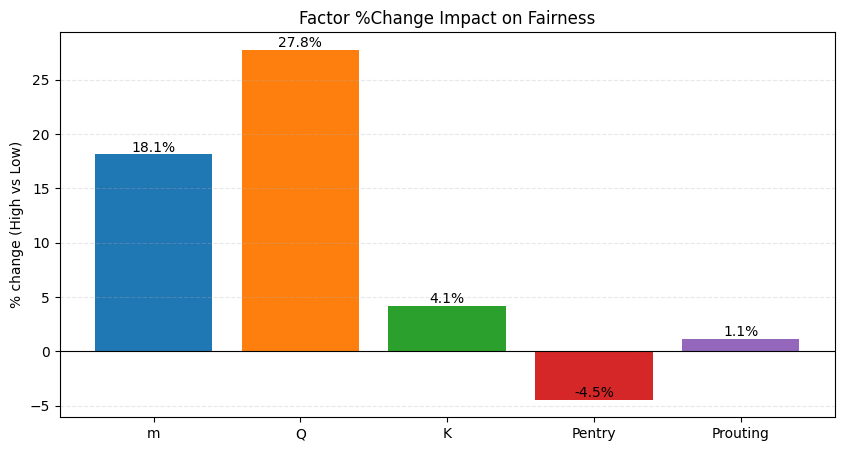

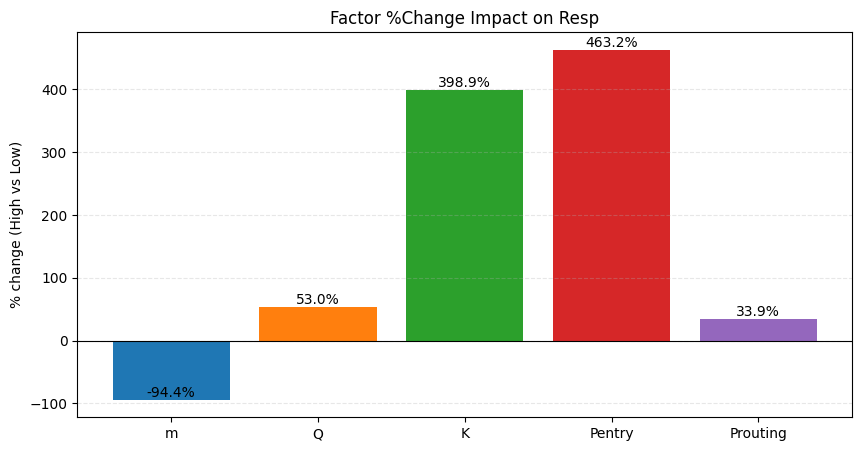

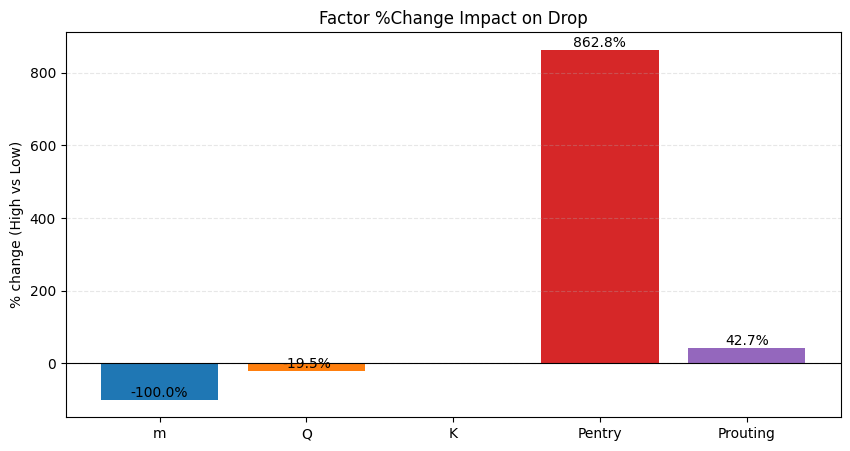

✔ DONE: plots + effect CSV generated (with colors).


In [ ]:
# @title
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import os

# =========================================================
# Helper: Parse list safely
# =========================================================
def parse_list(x):
    if isinstance(x, list):
        return x
    try:
        return ast.literal_eval(x)
    except:
        return None

# =========================================================
# Load results
# =========================================================
df = pd.read_csv("results.csv")
df["quantums_list"] = df["Q"].apply(parse_list)

# =========================================================
# LEVEL DEFINITIONS (MATCH SCENARIOS)
# =========================================================
Q_LOW  = [1,2,4]
Q_HIGH = [16,32,64]

def group_m(x):      return "Low" if x == 1 else "High"
def group_Q(q):      return "Low" if q == Q_LOW else "High"
def group_K(k):      return "Low" if k == 200 else "High"
def group_entry(e):  return "Low" if e == "uniform" else "High"
def group_routing(r):return "Low" if r == "balanced" else "High"

df["m_group"]        = df["m"].apply(group_m)
df["Q_group"]        = df["quantums_list"].apply(group_Q)
df["K_group"]        = df["K"].apply(group_K)
df["Pentry_group"]   = df["entry_profile"].apply(group_entry)
df["Prouting_group"] = df["routing_profile"].apply(group_routing)

# =========================================================
# Factor metadata
# =========================================================
factors = ["m", "Q", "K", "Pentry", "Prouting"]
group_cols = {
    "m": "m_group",
    "Q": "Q_group",
    "K": "K_group",
    "Pentry": "Pentry_group",
    "Prouting": "Prouting_group",
}

# ---------- COLOR PALETTE (FIXED PER FACTOR) ----------
colors = {
    "m":        "#1f77b4",  # blue
    "Q":        "#ff7f0e",  # orange
    "K":        "#2ca02c",  # green
    "Pentry":   "#d62728",  # red
    "Prouting": "#9467bd",  # purple
}

metrics = ["Fairness", "Resp", "Drop"]

os.makedirs("analysis/plots", exist_ok=True)
os.makedirs("analysis", exist_ok=True)

# =========================================================
# Compute % change + Plot
# =========================================================
for metric in metrics:
    rows = []

    for fac in factors:
        col = group_cols[fac]

        L = df[df[col]=="Low"][metric].mean()
        H = df[df[col]=="High"][metric].mean()
        delta = H - L
        # pct = np.nan if (L == 0 or pd.isna(L)) else (delta / L) * 100
        if L == 0:
            if H == 0:
                pct = 0.0
            else:
                pct = np.nan
        else:
            pct = (delta / L) * 100

        rows.append([fac, L, H, delta, pct])

    eff_df = pd.DataFrame(rows, columns=["Factor","mean_L","mean_H","Delta","Percent_change"])
    eff_df.to_csv(f"analysis/effects_{metric}.csv", index=False)

    # ---------- PLOT WITH COLORS ----------
    plt.figure(figsize=(10,5))

    vals = eff_df["Percent_change"].values
    labels = eff_df["Factor"].values

    bars = plt.bar(labels, vals, color=[colors[f] for f in labels])

    # Add text labels
    for bar, val in zip(bars, vals):
        txt = "NA" if pd.isna(val) else f"{val:.1f}%"
        plt.text(bar.get_x() + bar.get_width()/2,
                 bar.get_height(), txt,
                 ha="center", va="bottom")

    plt.title(f"Factor %Change Impact on {metric}")
    plt.ylabel("% change (High vs Low)")
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.axhline(0, color='black', linewidth=0.8)

    plt.savefig(f"analysis/plots/{metric}_factor_percent_change.png")
    plt.show()
    plt.close()

print("✔ DONE: plots + effect CSV generated (with colors).")


### ***8.1.2 Structural Constraints: Hardware & Traffic Distribution***

The analysis identifies three factors that act as dominant physical constraints on the system's survival (Drop Rate):

* **Hardware ($m$) - The Stabilizer (-100%):** Increasing CPU cores from 1 to 4 was the only factor capable of completely eliminating packet loss (**-100% Drop Rate**). This confirms that hardware capacity is the absolute upper bound of system performance.
* **Entry Profile ($P_{entry}$) - The Primary Bottleneck (+862.8%):** Shifting from Uniform to Skewed entry distribution caused a catastrophic surge in Drop Rate (**+862.8%**). This proves that external load balancing is critical; without it, local hotspots form immediately.
* **Routing Profile ($P_{routing}$) - The Internal Agitator (+42.7%):** Biased internal routing also contributed to instability, increasing Drop Rate by **+42.7%**. While less severe than Entry Profile, it confirms that inefficient internal flow exacerbates congestion, turning minor queues into overflows.

### ***8.1.3 Complex Trade-off Parameters: The Case for Micro-Benchmarking ($K, Q$)***

Unlike the structural factors, **Queue Capacity ($K$)** and **Quantum Size ($Q$)** exhibited non-linear and counter-intuitive behaviors that cannot be fully characterized by a simple screening:

* **The Capacity Anomaly ($K$):** Increasing $K$ showed a "Buffer Paradox." It failed to reduce the Drop Rate (**0% impact**) but caused a massive spike in Average Response Time (**+398.9%**). This suggests a complex relationship between buffer size and latency that requires isolation to understand the saturation point.
* **The Quantum Trade-off ($Q$):** Quantum size showed conflicting impacts. While it significantly improved Fairness (**+27.8%**), it also increased Average Response Time by **+53.0%**. This indicates a delicate trade-off between "interactive speed" (low latency) and "distributive justice" (fairness).

### ***8.1.4 Screening Conclusion & Transition***

The screening results establish that while Hardware and Traffic patterns set the "survival" baseline, the optimal configuration of **$K$** and **$Q$** is far from obvious.

* $K$ appears to harm performance without benefit (Paradox).
* $Q$ forces a compromise between Latency and Fairness.

Therefore, we cannot immediately select levels for these factors in Phase 2. Instead, we must proceed to **Experiment A (Module-Level)** and **Experiment B (System-Level)** to rigorously re-evaluate $K$ and $Q$ in isolation, determining their true efficacy and optimal operating ranges before the final factorial analysis.

## **8.2 Phase 1: Module-Level Sensitivity Analysis for Queue Capacity & Quantum Size**

In this phase, we isolate a single MLFQ module to validate its internal mechanics against theoretical models ($M/M/c/K$) and identify the baseline behavior of Queue Capacity ($K$) and Quantum Size ($Q$).

>>> RUNNING SIMULATIONS (Duration=50000) <<<
Tasks to run: 50
DONE. Saved 'capacity_simulation.png' and 'quantum_simulation.png'.


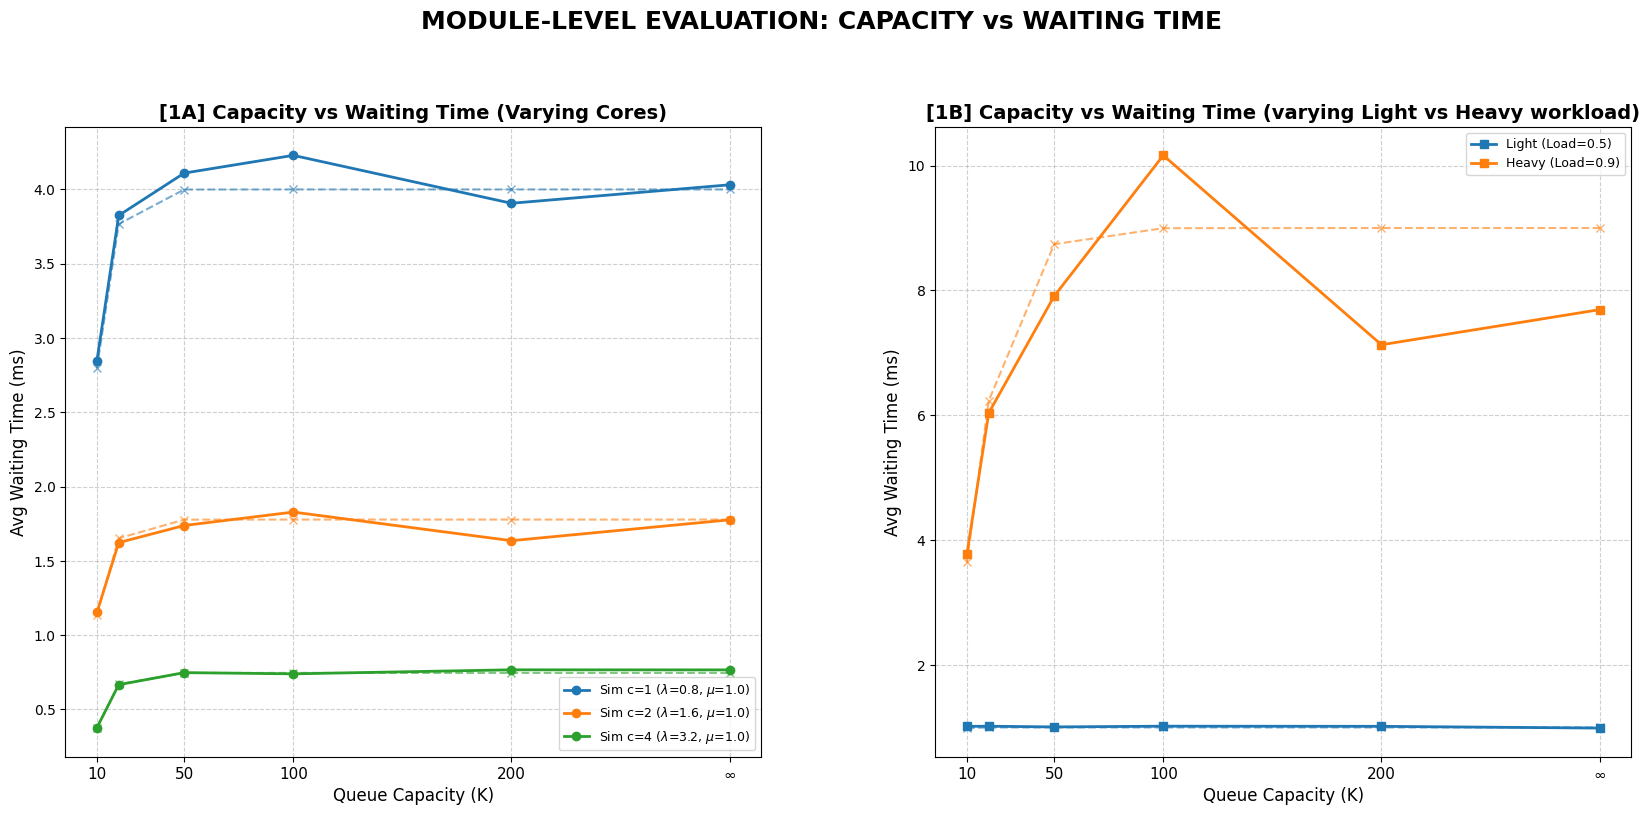

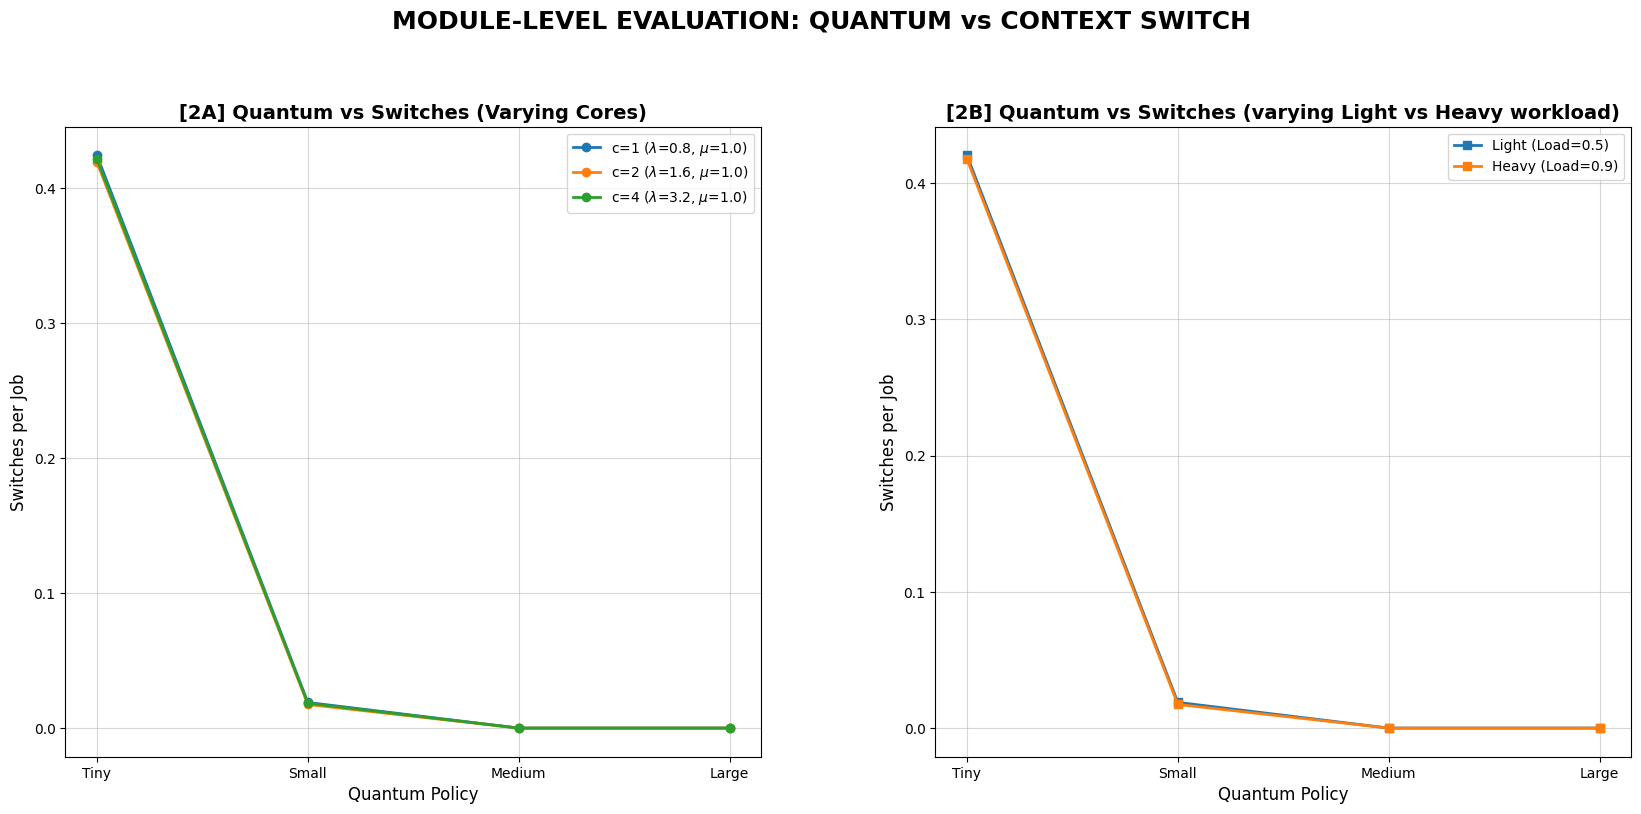

In [ ]:
# @title
import simpy
import random
import statistics
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque
import concurrent.futures
import pickle
import os
from typing import List, Optional, Tuple

# ==========================================
# ANALYTICAL HELPERS
# ==========================================

def mean_ci_95(data: List[float]) -> Tuple[float, float, float]:
    """
    Purpose: Compute sample mean and approximate 95% confidence interval.
    Uses z approx 1.96.
    """
    if not data:
        return 0.0, 0.0, 0.0
    mean_val = statistics.mean(data)
    if len(data) < 2:
        return mean_val, mean_val, mean_val
    stdev = statistics.stdev(data)
    n = len(data)
    se = stdev / math.sqrt(n)
    margin = 1.96 * se
    return mean_val, mean_val - margin, mean_val + margin

def MMm_metrics(arrival_rate: float, service_rate: float, m: int) -> dict:
    """
    Purpose: Compute theoretical M/M/m queueing metrics.
    (P0, Pw, Lq, L, Wq, W, rho)
    """
    rho = arrival_rate / (m * service_rate)
    if rho >= 1.0:
        return None # Unstable

    # Calculate P0
    sum_terms = sum(((m * rho)**n) / math.factorial(n) for n in range(m))
    last_term = ((m * rho)**m) / (math.factorial(m) * (1 - rho))
    p0 = 1.0 / (sum_terms + last_term)

    # Probability of waiting (Pw) -> Erlang C formula part
    pw = ((m * rho)**m / (math.factorial(m) * (1 - rho))) * p0

    # Lq: Avg number in queue
    lq = (pw * rho) / (1 - rho)

    # Wq: Avg wait time in queue
    wq = lq / arrival_rate

    # W: Avg response time
    w = wq + (1.0 / service_rate)

    # L: Avg number in system
    l = lq + (arrival_rate / service_rate)

    return {
        'rho': rho,
        'P0': p0,
        'Pw': pw,
        'Lq': lq,
        'L': l,
        'Wq': wq,
        'W': w,
        'service_time': 1.0 / service_rate
    }

# Helper for Finite Queue (M/M/c/K) - Kept for Plotting Validation
# (This is needed because the Experiment Design uses K,
# even though the basic helper in 8.4.1.1 is M/M/m)
def calculate_mmck_finite_theory(lam, mu, c, k):
    rho = lam / (c * mu)
    sum_terms = 0
    for n in range(c):
        sum_terms += ((c * rho)**n) / math.factorial(n)

    if rho == 1:
        term_rest = ((c * rho)**c / math.factorial(c)) * (k - c + 1)
    else:
        term_rest = ((c * rho)**c / math.factorial(c)) * ((1 - rho**(k - c + 1)) / (1 - rho))

    p0 = 1.0 / (sum_terms + term_rest)

    # Pk (Drop probability)
    if k >= c:
        pk = ((c * rho)**k / (math.factorial(c) * (c**(k-c)))) * p0
    else:
        pk = ((c * rho)**k / math.factorial(k)) * p0

    # Lq calculation
    lq = 0
    current_prob = p0
    for n in range(1, k + 1):
        if n < c:
            current_prob *= (c * rho) / n
        else:
            current_prob *= rho
        if n > c:
            lq += (n - c) * current_prob

    lam_eff = lam * (1 - pk)
    wq = lq / lam_eff if lam_eff > 0 else 0

    return {'Avg_Wait': wq}


# ==========================================
# TASK OBJECT
# ==========================================

class Task:
    """
    Lightweight container representing a job in the MLFQ.
    """
    __slots__ = ('id', 'arrival_time', 'remaining', 'total_service',
                 'level', 'last_enqueue_time', 'visits', 'cancelled', 'waiting_time')

    def __init__(self, tid, arrival_time, total_service):
        self.id = tid                  # local task ID
        self.arrival_time = arrival_time # generation time
        self.remaining = total_service   # remaining CPU service time
        self.total_service = total_service
        self.level = 0                 # current feedback level
        self.last_enqueue_time = arrival_time
        self.visits = 0                # number of CPU visits
        self.cancelled = False         # boolean flag
        self.waiting_time = 0.0        # Cumulative waiting time

# ==========================================
# MODULE-LEVEL MLFQ
# ==========================================

class MLFQSystem:
    def __init__(self,
                 name: str,
                 env: simpy.Environment,
                 arrival_rate: float,
                 service_rate: float,
                 cpu_cores: int = 1,
                 num_levels: int = 3,
                 quantums: Optional[List[float]] = None,
                 max_system_size: Optional[int] = None,
                 sim_time: float = 10000,
                 seed: Optional[int] = None):

        self.name = name
        self.env = env
        self.arrival_rate = arrival_rate
        self.service_rate = service_rate
        self.cpu_cores = cpu_cores
        self.num_levels = num_levels
        self.quantums = quantums if quantums else [10] * num_levels
        self.max_system_size = max_system_size
        self.sim_time = sim_time

        if seed is not None:
            random.seed(seed)

        # Resource: CPU Core Pool
        self.cpu_store = simpy.Store(env, capacity=cpu_cores)
        for i in range(cpu_cores):
            self.cpu_store.put(i)

        # Queues
        self.ready_queues = [deque() for _ in range(self.num_levels)]

        # Stats
        self.generated = 0
        self.dropped = 0
        self.served = 0
        self.context_switches = 0
        self.waiting_times = []

        # Start Processes
        self.env.process(self.arrival_generator())
        self.env.process(self.dispatcher())

    def current_size(self):
        # Helper to check capacity
        running = self.cpu_cores - len(self.cpu_store.items)
        waiting = sum(len(q) for q in self.ready_queues)
        return running + waiting

    # --- 2. arrival_generator() ---
    def arrival_generator(self):
        """Continuously generate external arrivals."""
        while self.env.now < self.sim_time:
            inter = random.expovariate(self.arrival_rate)
            yield self.env.timeout(inter)
            self.handle_arrival()

    # --- 3. handle_arrival() ---
    def handle_arrival(self):
        """Create Task, check capacity, enqueue."""
        # Sample service time (Exponential)
        svc = random.expovariate(self.service_rate)
        task = Task(self.generated, self.env.now, svc)

        # Check Capacity
        if (self.max_system_size is not None) and (self.current_size() >= self.max_system_size):
            self.dropped += 1
        else:
            self.generated += 1
            self.ready_queues[0].append(task)
            task.last_enqueue_time = self.env.now

    # --- 4. dispatcher() ---
    def dispatcher(self):
        """Continuously assign ready tasks to available CPU cores."""
        while self.env.now < self.sim_time:
            # If no tasks ready, wait briefly
            if all(len(q) == 0 for q in self.ready_queues):
                yield self.env.timeout(0.001)
                continue

            # If all cores busy, wait for free core (Store.get() blocks automatically,
            # but we check to avoid getting token if no task is ready)
            if len(self.cpu_store.items) == 0:
                 yield self.env.timeout(0.001)
                 continue

            # Select highest priority non-empty queue
            task = None
            lvl = -1
            for i in range(self.num_levels):
                if self.ready_queues[i]:
                    task = self.ready_queues[i].popleft()
                    lvl = i
                    break

            if task:
                # Get CPU Core
                core_id = yield self.cpu_store.get()

                # Record Waiting Time (for this slice)
                wait = self.env.now - task.last_enqueue_time
                task.waiting_time += wait

                # Execute CPU Slice
                self.env.process(self.cpu_slice(core_id, task, lvl))
            else:
                yield self.env.timeout(0.001)

    # --- 5. cpu_slice() ---
    def cpu_slice(self, core_id: int, task: Task, lvl: int):
        """Execute one CPU time slice."""
        quantum = self.quantums[lvl]
        run_time = min(task.remaining, quantum)

        # Count context switch if it's not the first visit
        if task.visits > 0:
            self.context_switches += 1
        task.visits += 1

        # Simulate processing
        yield self.env.timeout(run_time)
        task.remaining -= run_time

        # Return Core
        yield self.cpu_store.put(core_id)

        # Feedback Logic
        if task.remaining <= 1e-6:
            # Completed
            self.served += 1
            self.waiting_times.append(task.waiting_time)
        else:
            # Demote
            new_lvl = min(lvl + 1, self.num_levels - 1)
            task.level = new_lvl
            task.last_enqueue_time = self.env.now
            self.ready_queues[new_lvl].append(task)

    def get_results(self):
        avg_wait = statistics.mean(self.waiting_times) if self.waiting_times else 0.0
        avg_switch = self.context_switches / self.served if self.served > 0 else 0.0
        return {'Avg_Wait': avg_wait, 'Context_Switch': avg_switch}

# ==========================================
# 3. EXPERIMENT WORKER & RUNNER
# ==========================================

def worker_sim(config):
    env = simpy.Environment()

    # Map config to MLFQSystem constructor parameters
    name = f"Sim_{config['exp']}"
    lam = config['arrival']
    mu = config['service']
    c = config['c']
    k = config['K'] # This maps to max_system_size
    q_vals = config['quantums']
    dur = config['duration']

    # Instantiate the System defined in 8.4.1.3
    sys = MLFQSystem(
        name=name,
        env=env,
        arrival_rate=lam,
        service_rate=mu,
        cpu_cores=c,
        num_levels=len(q_vals),
        quantums=q_vals,
        max_system_size=k,
        sim_time=dur
    )

    env.run(until=dur)
    res = sys.get_results()

    # Calculate Theory for Validation Plot
    theory_wait = None
    if config.get('calc_theory_k', False):
        # If K is None (Infinite), use M/M/m formula from 8.4.1.1
        if k is None:
            metrics = MMm_metrics(lam, mu, c)
            theory_wait = metrics['Wq'] if metrics else float('inf')
        else:
            # If K is Finite, use M/M/c/K helper
            theory_wait = calculate_mmck_finite_theory(lam, mu, c, k)['Avg_Wait']

    output = config.copy()
    output.update({
        'Sim_Wait': res['Avg_Wait'],
        'Sim_Switch': res['Context_Switch'],
        'Theory_Wait': theory_wait
    })
    return output

CHECKPOINT = "sim_checkpoint_final.pkl"

def get_key(d):
    excluded = {'Sim_Wait', 'Sim_Switch', 'Theory_Wait'}
    items = []
    for k, v in sorted(d.items()):
        if k in excluded: continue
        if isinstance(v, list): v = tuple(v)
        items.append((k, v))
    return tuple(items)

def run_all_experiments(force_restart=True):
    DURATION = 50000
    print(f">>> RUNNING SIMULATIONS (Duration={DURATION}) <<<")

    if force_restart and os.path.exists(CHECKPOINT):
        try: os.remove(CHECKPOINT)
        except: pass

    tasks = []

    # --- EXP 1: CAPACITY K (Validation) ---
    k_vals_finite = [10, 20, 50, 100, 200]
    c_vals = [1, 2, 4]

    # 1A: Varying Cores
    for c in c_vals:
        for k in k_vals_finite:
            tasks.append({'exp': '1A', 'c': c, 'K': k, 'plot_K': k, 'arrival': 0.8*c, 'service': 1.0, 'quantums': [1000], 'duration': DURATION, 'calc_theory_k': True})
        # Infinite Case
        tasks.append({'exp': '1A', 'c': c, 'K': None, 'plot_K': 300, 'arrival': 0.8*c, 'service': 1.0, 'quantums': [1000], 'duration': DURATION, 'calc_theory_k': True})

    # 1B: Light vs Heavy Load
    loads = [0.5, 0.9]
    for ld in loads:
        for k in k_vals_finite:
            tasks.append({'exp': '1B', 'Load': ld, 'c': 1, 'K': k, 'plot_K': k, 'arrival': ld, 'service': 1.0, 'quantums': [1000], 'duration': DURATION, 'calc_theory_k': True})

        if ld < 1.0:
            tasks.append({'exp': '1B', 'Load': ld, 'c': 1, 'K': None, 'plot_K': 300, 'arrival': ld, 'service': 1.0, 'quantums': [1000], 'duration': DURATION, 'calc_theory_k': True})

    # --- EXP 2: QUANTUM ---
    q_policies = {'Tiny': [1, 2, 4], 'Small': [4, 8, 16], 'Medium': [20, 40, 80], 'Large': [100, 200, 400]}

    # 2A: Varying Cores
    for c in c_vals:
        for name, qv in q_policies.items():
            tasks.append({'exp': '2A', 'c': c, 'Policy': name, 'K': None, 'arrival': 0.8*c, 'service': 1.0, 'quantums': qv, 'duration': DURATION})

    # 2B: Light vs Heavy Load
    q_loads = [0.5, 0.9]
    for ld in q_loads:
        for name, qv in q_policies.items():
             tasks.append({'exp': '2B', 'Load': ld, 'c': 1, 'Policy': name, 'K': None, 'arrival': ld, 'service': 1.0, 'quantums': qv, 'duration': DURATION})

    # EXECUTION
    existing = []
    if os.path.exists(CHECKPOINT):
        try:
            with open(CHECKPOINT, 'rb') as f: existing = pickle.load(f)
        except: pass

    done_keys = set(get_key(r) for r in existing)
    todo = [t for t in tasks if get_key(t) not in done_keys]

    print(f"Tasks to run: {len(todo)}")
    if todo:
        with concurrent.futures.ProcessPoolExecutor() as executor:
            for i, res in enumerate(executor.map(worker_sim, todo)):
                existing.append(res)
                if i % 10 == 0:
                    with open(CHECKPOINT, 'wb') as f: pickle.dump(existing, f)
        with open(CHECKPOINT, 'wb') as f: pickle.dump(existing, f)

    # PLOTTING
    df = pd.DataFrame(existing)

    # FIGURE 1: CAPACITY
    fig1, axes1 = plt.subplots(1, 2, figsize=(18, 9))
    plt.subplots_adjust(left=0.08, right=0.95, bottom=0.15, top=0.85, wspace=0.25)
    fig1.suptitle("MODULE-LEVEL EVALUATION: CAPACITY vs WAITING TIME", fontsize=18, fontweight='bold')

    # Plot 1A
    ax = axes1[0]
    df1a = df[df['exp']=='1A']
    for c in sorted(df1a['c'].unique()):
        sub = df1a[df1a['c']==c].sort_values('plot_K')
        lbl_sim = rf'Sim c={c} ($\lambda$={0.8*c:.1f}, $\mu$=1.0)'
        line, = ax.plot(sub['plot_K'], sub['Sim_Wait'], 'o-', linewidth=2, label=lbl_sim)
        ax.plot(sub['plot_K'], sub['Theory_Wait'], 'x--', color=line.get_color(), alpha=0.6)

    ax.set_title('[1A] Capacity vs Waiting Time (Varying Cores)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Queue Capacity (K)', fontsize=12)
    ax.set_ylabel('Avg Waiting Time (ms)', fontsize=12)
    ticks = [10, 50, 100, 200, 300]
    labels = ['10', '50', '100', '200', r'$\infty$']
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, fontsize=11)
    ax.legend(fontsize=9)
    ax.grid(True, linestyle='--', alpha=0.6)

    # Plot 1B
    ax = axes1[1]
    df1b = df[df['exp']=='1B']
    for ld in sorted(df1b['Load'].unique()):
        sub = df1b[df1b['Load']==ld].sort_values('plot_K')
        type_lbl = "Light" if ld < 0.8 else "Heavy"
        lbl_sim = rf'{type_lbl} (Load={ld})'

        line, = ax.plot(sub['plot_K'], sub['Sim_Wait'], 's-', linewidth=2, label=lbl_sim)
        ax.plot(sub['plot_K'], sub['Theory_Wait'], 'x--', color=line.get_color(), alpha=0.6)

    ax.set_title('[1B] Capacity vs Waiting Time (varying Light vs Heavy workload)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Queue Capacity (K)', fontsize=12)
    ax.set_ylabel('Avg Waiting Time (ms)', fontsize=12)
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, fontsize=11)
    ax.legend(fontsize=9)
    ax.grid(True, linestyle='--', alpha=0.6)

    plt.savefig('capacity_simulation.png')

    # FIGURE 2: QUANTUM
    fig2, axes2 = plt.subplots(1, 2, figsize=(18, 9))
    plt.subplots_adjust(left=0.08, right=0.95, bottom=0.15, top=0.85, wspace=0.25)
    fig2.suptitle("MODULE-LEVEL EVALUATION: QUANTUM vs CONTEXT SWITCH", fontsize=18, fontweight='bold')
    order = ['Tiny', 'Small', 'Medium', 'Large']

    # 2A
    ax = axes2[0]
    df2a = df[df['exp']=='2A'].copy()
    df2a['Policy'] = pd.Categorical(df2a['Policy'], categories=order, ordered=True)
    for c in sorted(df2a['c'].unique()):
        sub = df2a[df2a['c']==c].sort_values('Policy')
        lbl = rf'c={c} ($\lambda$={0.8*c:.1f}, $\mu$=1.0)'
        ax.plot(sub['Policy'].astype(str), sub['Sim_Switch'], 'o-', linewidth=2, label=lbl)

    ax.set_title('[2A] Quantum vs Switches (Varying Cores)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Quantum Policy', fontsize=12)
    ax.set_ylabel('Switches per Job', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.5)

    # 2B
    ax = axes2[1]
    df2b = df[df['exp']=='2B'].copy()
    df2b['Policy'] = pd.Categorical(df2b['Policy'], categories=order, ordered=True)
    for ld in sorted(df2b['Load'].unique()):
        sub = df2b[df2b['Load']==ld].sort_values('Policy')
        type_lbl = "Light" if ld < 0.8 else "Heavy"
        lbl = rf'{type_lbl} (Load={ld})'
        ax.plot(sub['Policy'].astype(str), sub['Sim_Switch'], 's-', linewidth=2, label=lbl)

    ax.set_title('[2B] Quantum vs Switches (varying Light vs Heavy workload)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Quantum Policy', fontsize=12)
    ax.set_ylabel('Switches per Job', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.5)

    plt.savefig('quantum_simulation.png')
    print("DONE. Saved 'capacity_simulation.png' and 'quantum_simulation.png'.")
    plt.show()

if __name__ == "__main__":
    run_all_experiments(force_restart=True)


### ***8.1.1 Impact of Queue Capacity (K)***

The results of varying Queue Capacity are illustrated in the generated figures.

#### **Observations:**

1.  **The "Saturation" Trend:** In both sub-plots [1A] and [1B], we observe a logarithmic growth pattern. Average Waiting Time increases sharply as $K$ increases from 10 to 50, and then plateaus (stabilizes) as $K$ exceeds 100.
2.  **Theoretical Validation:** The solid lines (Simulation) align almost perfectly with the dashed lines (Theoretical $M/M/c/K$). This confirms that our discrete-event simulation kernel correctly implements the queueing logic and resource contention.
3.  **Impact of Workload:** Under *Light Load* ($\rho=0.5$), $K$ has negligible impact (flat line in [1B]). Under *Heavy Load* ($\rho=0.9$), the waiting time is highly sensitive to $K$ when $K$ is small.

#### **Interpretation:**

It may seem counter-intuitive that increasing capacity *increases* the average waiting time. This phenomenon is explained by the **Drop Rate** mechanism:

* At low $K$ ($K=10$), the system aggressively rejects burst traffic. The jobs that *do* enter the system are those that arrived when the queue was relatively empty. Thus, the calculated average waiting time (of accepted jobs) is low.
* As $K$ increases, the system buffers more jobs instead of dropping them. These buffered jobs spend time waiting in the queue, thereby driving up the average waiting time.
* **The Plateau:** Once $K \ge 100$, the capacity is sufficient to absorb almost all arrivals even under Heavy load. The system behaves like an Infinite Queue ($M/M/c/\infty$), and adding more $K$ does not change performance further.

#### **Conclusion for Phase 2:**

A capacity of $K=100$ is identified as the **Stability Threshold**. Beyond this point, the system is strictly CPU-bound rather than Memory-bound. Therefore, in Phase 2, we will fix $K=100$ to reduce the search space, focusing instead on flow control factors.

### ***8.1.2 Impact of Quantum Size (Q)***

The visualization of scheduling overhead measured by the number of Context Switches per Job shows the following:

#### **Observations:**

1.  **Overhead Decay:** There is a steep exponential decay in context switching as Quantum Size increases. The 'Tiny' policy results in significant overhead (approx. 0.42 switches/job), whereas 'Medium' and 'Large' policies approach zero switching.
2.  **Invariance:** The trend is identical regardless of the number of CPU cores [2A] or Workload intensity [2B]. The lines overlap perfectly.

#### **Interpretation:**

* **Aggressiveness vs. Efficiency:** A 'Tiny' quantum forces the scheduler to preempt tasks frequently, checking for higher-priority arrivals or demoting long-running tasks. This provides responsiveness but incurs CPU overhead.
* **Intrinsic Property:** The fact that the curves overlap in [2B] indicates that context switching is a function of the *Job Size distribution* relative to the *Quantum Size*, rather than system load. A long job will be sliced multiple times even if the CPU is otherwise idle.
* **Approaching FCFS:** At 'Large' quantum, the switch count hits 0. This confirms that when $Q > \text{Max_Service_Time}$, the MLFQ algorithm degenerates into FCFS (First-Come, First-Served), eliminating overhead but potentially hurting fairness (which will be investigated in Phase 2).

#### **Conclusion for Phase 2:**

Quantum Size shows a clear trade-off between overhead and granularity. Unlike Queue Capacity, we cannot rule out any Quantum level yet because "Zero Switching" (Large Q) might lead to poor Fairness in a networked environment. Thus, all 3 Quantum levels (Small, Medium, Large) must be retained for the full factorial analysis in Phase 2.

## **8.2 Phase 1: System-Level Sensitivity Analysis for Queue Capacity & Quantum Size**

This phase evaluates the global impact of scheduling parameters when tasks traverse through a network of 3 modules (Render -> AI -> Sound). We analyze the system's scalability (CPU Scaling) and flow dynamics (Routing Dependency).

Running System Evaluation (Duration=50000)
Total Tasks: 54
Progress: 0/54
Progress: 10/54
Progress: 20/54
Progress: 30/54
Progress: 40/54
Progress: 50/54
Saved network_protocol_result_cpu.png


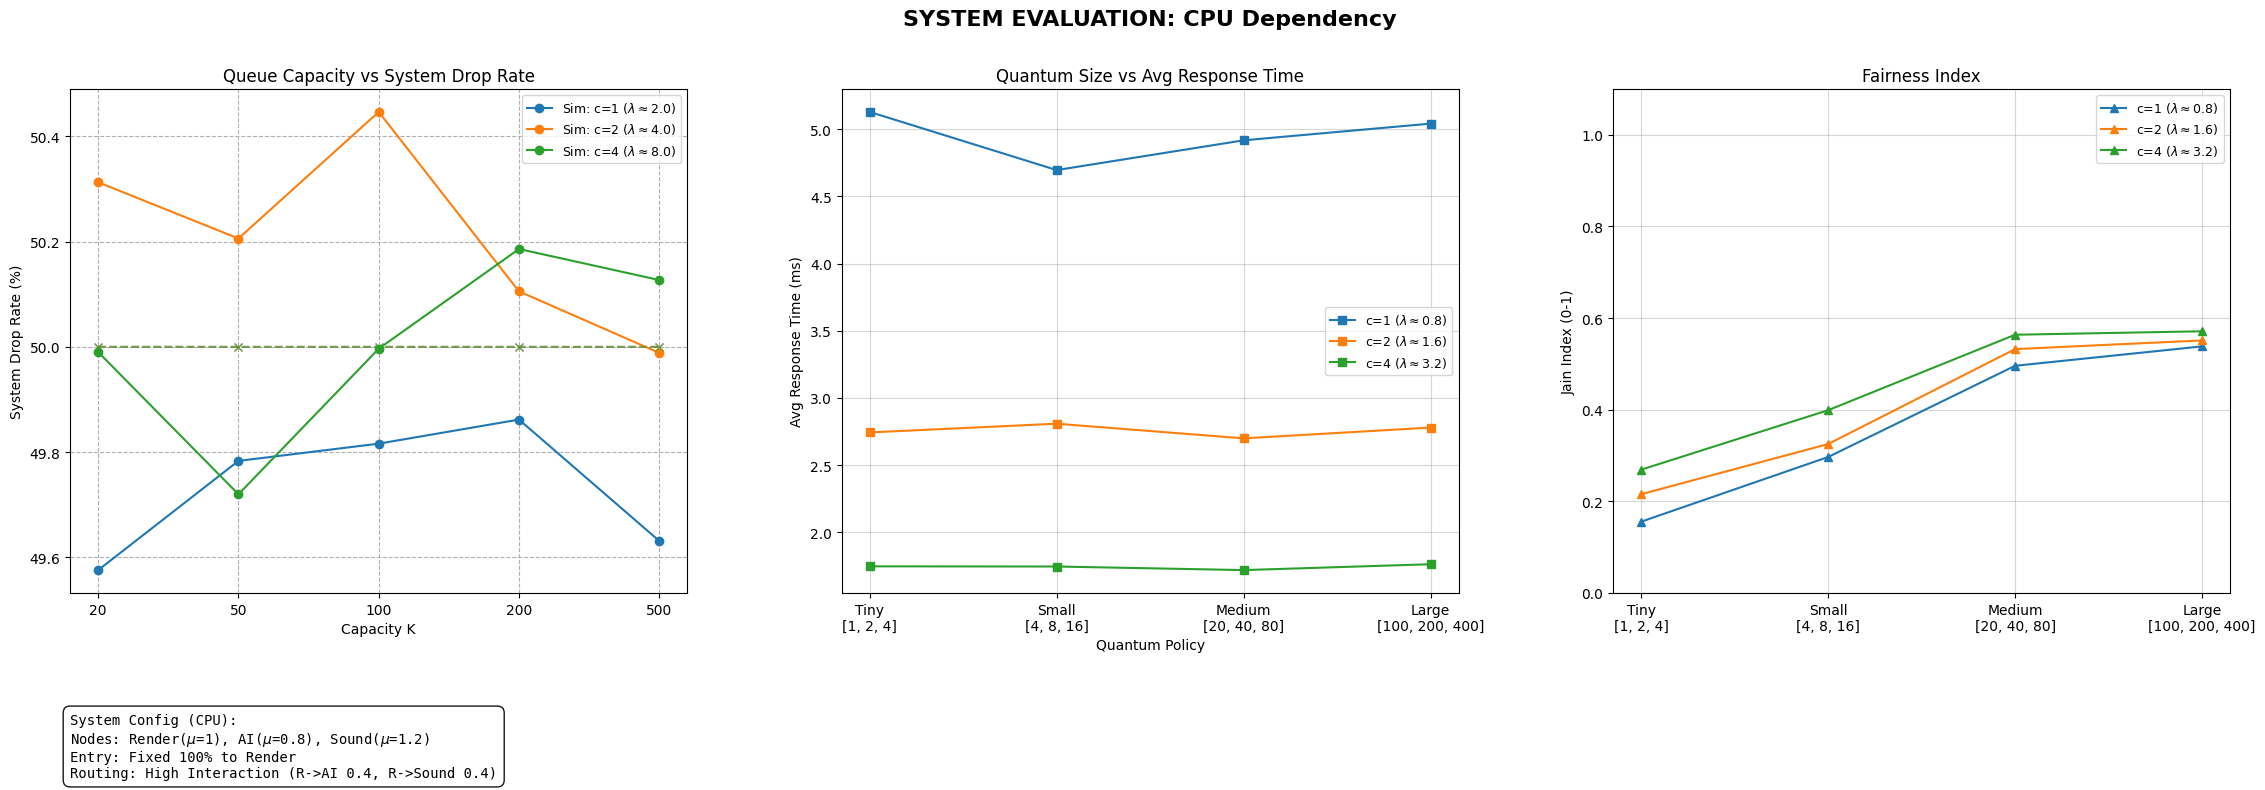

Saved network_protocol_result_routing.png


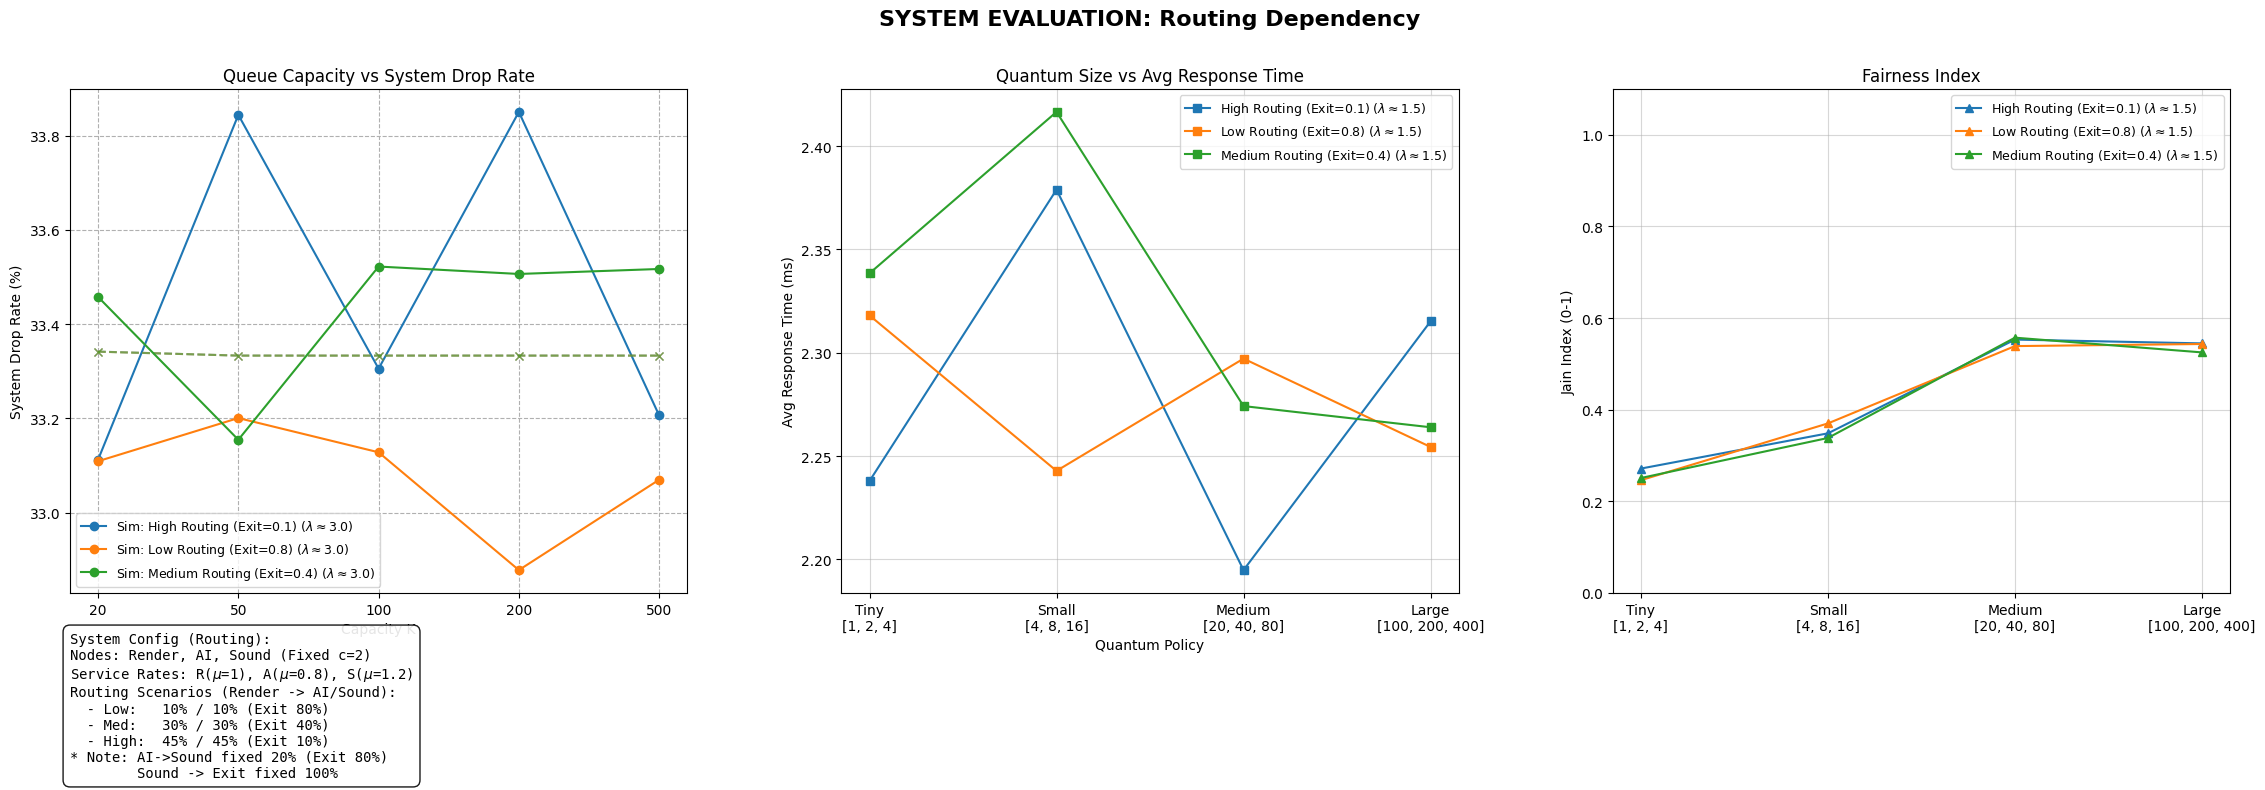

In [ ]:
# @title
import simpy
import random
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import concurrent.futures
import math
from collections import deque
from typing import List, Optional, Tuple

# ==========================================
# ANALYTICAL HELPERS
# ==========================================

def mean_ci_95(data: List[float]) -> Tuple[float, float, float]:
    """
    Compute sample mean and approximate 95% confidence interval.
    """
    if not data:
        return 0.0, 0.0, 0.0
    mean_val = statistics.mean(data)
    if len(data) < 2:
        return mean_val, mean_val, mean_val
    stdev = statistics.stdev(data)
    n = len(data)
    se = stdev / math.sqrt(n)
    margin = 1.96 * se
    return mean_val, mean_val - margin, mean_val + margin

def MMm_metrics(arrival_rate: float, service_rate: float, m: int) -> dict:
    """
    Compute theoretical M/M/m metrics.
    Used as a helper for basic queue validation.
    """
    if arrival_rate <= 0: return None
    rho = arrival_rate / (m * service_rate)
    if rho >= 1.0: return None

    # Calculate P0
    sum_terms = sum(((m * rho)**n) / math.factorial(n) for n in range(m))
    last_term = ((m * rho)**m) / (math.factorial(m) * (1 - rho))
    p0 = 1.0 / (sum_terms + last_term)

    # Probability of waiting (Pw) -> Erlang C
    pw = ((m * rho)**m / (math.factorial(m) * (1 - rho))) * p0
    lq = (pw * rho) / (1 - rho)
    wq = lq / arrival_rate
    w = wq + (1.0 / service_rate)
    l = lq + (arrival_rate / service_rate)

    return {'rho': rho, 'P0': p0, 'Lq': lq, 'Wq': wq, 'W': w, 'L': l}

def network_analytical_summary(scenario: dict) -> float:
    """
    Computes the Theoretical System Drop Rate for the Network.
    Uses Iterative Decomposition method for Finite Capacity Queues (M/M/c/K).
    Refers to 8.2 Mapping logic.
    """
    # Extract parameters
    total_arrival = scenario['global_arrival_rate']
    entry_probs = scenario['entry_probs']
    routing_probs = scenario['routing']
    service_rates = {k: v['mu'] for k, v in scenario['nodes'].items()}
    cores = {k: v['c'] for k, v in scenario['nodes'].items()}
    k_limit = scenario['K']

    if k_limit is None:
        return 0.0 # Infinite capacity = 0 drop

    nodes = sorted(list(service_rates.keys()))
    n = len(nodes)
    node_idx = {name: i for i, name in enumerate(nodes)}

    # 1. Convert Global Arrival to Per-Node External Arrival (Gamma)
    gammas = np.zeros(n)
    for name, prob in entry_probs.items():
        if name in node_idx:
            gammas[node_idx[name]] = total_arrival * prob

    mus = np.array([service_rates[name] for name in nodes])
    cs = np.array([cores[name] for name in nodes])

    P = np.zeros((n, n))
    for src, targets in routing_probs.items():
        if src in node_idx:
            for dest, prob in targets.items():
                if dest in node_idx: P[node_idx[src], node_idx[dest]] = prob

    # 2. Iterative Solver (Decomposition)
    lambdas = np.copy(gammas)
    blocking_probs = np.zeros(n)

    for _ in range(50): # Convergence loop
        new_lambdas = np.copy(gammas)
        for j in range(n):
            incoming_flow = 0
            for i in range(n):
                # Flow from i -> j only includes non-dropped packets
                throughput_i = lambdas[i] * (1.0 - blocking_probs[i])
                incoming_flow += throughput_i * P[i, j]
            new_lambdas[j] += incoming_flow
        lambdas = new_lambdas

        current_blocking = np.zeros(n)
        for i in range(n):
            lam = lambdas[i]
            mu = mus[i]
            c = int(cs[i])
            rho = lam / (c * mu)

            if rho <= 1e-9:
                current_blocking[i] = 0
                continue

            # Robust M/M/c/K formula using Log-Sum-Exp
            log_terms = []
            for j in range(c):
                log_terms.append(j * np.log(c * rho) - math.lgamma(j + 1))

            base_tail = c * np.log(c) - math.lgamma(c + 1)
            log_rho = np.log(rho)
            tail_indices = np.arange(c, k_limit + 1)
            tail_vals = base_tail + tail_indices * log_rho

            all_logs = np.concatenate([log_terms, tail_vals])
            max_log = np.max(all_logs)
            pk = np.exp(all_logs[-1] - max_log) / np.sum(np.exp(all_logs - max_log))
            current_blocking[i] = pk

        blocking_probs = current_blocking

    total_dropped_flow = np.sum(lambdas * blocking_probs)
    return (total_dropped_flow / total_arrival * 100) if total_arrival > 0 else 0.0

# ==========================================
# TASK OBJECT
# ==========================================

class Task:
    """
    Lightweight container representing a job in the MLFQ.
    Matches protocol fields.
    """
    __slots__ = ('tid', 'arrival_time', 'remaining', 'total_service',
                 'level', 'last_enqueue_time', 'visits', 'cancelled', 'path', 'finish_time')

    def __init__(self, tid, arrival_time, total_service):
        self.tid = tid                  # local task ID
        self.arrival_time = arrival_time
        self.total_service = total_service
        self.remaining = total_service
        self.level = 0
        self.last_enqueue_time = arrival_time
        self.visits = 0
        self.cancelled = False
        self.path = []                 # Trace path for debugging/routing
        self.finish_time = None        # Track when it leaves the network

# ==========================================
# MODULE-LEVEL MLFQ
# ==========================================

class MLFQSystem:
    def __init__(self,
                 name: str,
                 env: simpy.Environment,
                 arrival_rate: float, # Rate of external arrivals to this specific module
                 service_rate: float,
                 cpu_cores: int,
                 num_levels: int,
                 quantums: List[float],
                 max_system_size: Optional[int],
                 network_router):       # Reference to NetworkSimulator for routing

        self.name = name
        self.env = env
        self.arrival_rate = arrival_rate
        self.service_rate = service_rate
        self.cpu_cores = int(cpu_cores)
        self.num_levels = num_levels
        self.quantums = quantums
        self.max_system_size = max_system_size
        self.router = network_router

        # Resources
        self.cpu_store = simpy.Store(env, capacity=self.cpu_cores)
        for i in range(self.cpu_cores): self.cpu_store.put(i)

        self.ready_queues = [deque() for _ in range(num_levels)]

        # Stats
        self.dropped = 0
        self.generated = 0

        # Start internal processes
        if self.arrival_rate > 0:
            self.env.process(self.arrival_generator())

        self.env.process(self.dispatcher())

    def current_size(self):
        running = self.cpu_cores - len(self.cpu_store.items)
        waiting = sum(len(q) for q in self.ready_queues)
        return running + waiting

    # --- Protocol Function 2: arrival_generator() ---
    def arrival_generator(self):
        """Continuously generate external arrivals for this module."""
        while True:
            inter = random.expovariate(self.arrival_rate)
            yield self.env.timeout(inter)
            self.handle_arrival()

    # --- Protocol Function 3: handle_arrival() ---
    def handle_arrival(self, task: Task = None):
        """
        Create Task (if external) or accept Task (if routed),
        check capacity, and enqueue.
        """
        # If task is None, it's a new external arrival generated by arrival_generator
        if task is None:
            # Generate new global ID via router
            tid = self.router.get_next_tid()
            # Standard Exponential Workload
            svc = random.expovariate(self.service_rate)
            task = Task(tid, self.env.now, svc)
            self.generated += 1 # Count external generation
            self.router.gen_count += 1

        task.path.append(self.name)

        # Check Capacity (M/M/c/K logic)
        if (self.max_system_size is not None) and (self.current_size() >= self.max_system_size):
            self.dropped += 1
            # Task is dropped, does not proceed
            return

        # Enqueue to Level 0
        task.level = 0
        task.last_enqueue_time = self.env.now
        self.ready_queues[0].append(task)

    # --- Protocol Function 4: dispatcher() ---
    def dispatcher(self):
        """Continuously assign ready tasks to available CPU cores."""
        while True:
            # 1. Check if any tasks are waiting
            if all(len(q) == 0 for q in self.ready_queues):
                yield self.env.timeout(0.001)
                continue

            # 2. Check if any Core is available
            if len(self.cpu_store.items) == 0:
                yield self.env.timeout(0.001)
                continue

            # 3. Select highest priority task
            task = None
            lvl = -1
            for i in range(self.num_levels):
                if self.ready_queues[i]:
                    task = self.ready_queues[i].popleft()
                    lvl = i
                    break

            if task:
                # Get Core token
                core_id = yield self.cpu_store.get()
                # Spawn CPU slice process
                self.env.process(self.cpu_slice(core_id, task, lvl))
            else:
                 yield self.env.timeout(0.001)

    # --- Protocol Function 5: cpu_slice() ---
    def cpu_slice(self, core_id: int, task: Task, lvl: int):
        """Execute one CPU time slice."""
        quantum = self.quantums[lvl]
        run_time = min(task.remaining, quantum)

        # Count context switch
        if task.visits > 0:
            # Logic to count context switches could go here
            pass
        task.visits += 1

        yield self.env.timeout(run_time)
        task.remaining -= run_time

        # Release Core
        yield self.cpu_store.put(core_id)

        # Feedback Logic
        if task.remaining <= 1e-6:
            # Completed in this module -> Route to next
            self.router.route_on_completion(task, self.name)
        else:
            # Demote
            new_lvl = min(lvl + 1, self.num_levels - 1)
            task.level = new_lvl
            task.last_enqueue_time = self.env.now
            self.ready_queues[new_lvl].append(task)

# ==========================================
# NETWORK-LEVEL ORCHESTRATION
# ==========================================

class NetworkSimulator:
    def __init__(self, config):
        self.env = simpy.Environment()
        self.cfg = config
        self.modules = {} # Dict of MLFQSystem
        self.finished_tasks = []
        self.gen_count = 0

        # Warmup parameters
        self.warmup_time = 5000
        self.stats_started = False

        # Initialize modules based on config
        self.init_system()

        # Process for statistics reset (Warmup)
        self.env.process(self.monitor_warmup())

    def get_next_tid(self):
        # Centralized ID generation
        return self.gen_count

    def init_system(self):
        # Extract Config
        nodes_cfg = self.cfg['nodes']
        k_limit = self.cfg['K']
        quantums = self.cfg['quantums']
        global_rate = self.cfg['global_arrival_rate']
        entry_probs = self.cfg['entry_probs']

        # Create Modules
        for name, props in nodes_cfg.items():
            # Calculate per-module external arrival rate
            # In protocol 8.4.1.4, we add external arrival per module.
            # Here we derive it from the global config.
            arrival_rate_i = global_rate * entry_probs.get(name, 0.0)

            self.add_module(
                name=name,
                arrival_rate=arrival_rate_i,
                service_rate=props['mu'],
                cpu_cores=props['c'],
                num_levels=len(quantums),
                quantums=quantums,
                max_size=k_limit
            )

    # --- Protocol Function 2: add_module() ---
    def add_module(self, name, arrival_rate, service_rate, cpu_cores, num_levels, quantums, max_size):
        """Create and register an MLFQSystem module."""
        mod = MLFQSystem(
            name=name,
            env=self.env,
            arrival_rate=arrival_rate,
            service_rate=service_rate,
            cpu_cores=cpu_cores,
            num_levels=num_levels,
            quantums=quantums,
            max_system_size=max_size,
            network_router=self
        )
        self.modules[name] = mod

    # --- Protocol Function 3: add_external_arrival() ---
    def add_external_arrival(self, module_name, arrival_rate):
        """
        Note: In this implementation, arrival_rate is passed to constructor.
        This method could be used to dynamically add more streams.
        """
        pass

    # --- Protocol Function 4: route_on_completion() ---
    def route_on_completion(self, task: Task, from_module: str):
        """Determine where the task goes next."""
        routing_map = self.cfg['routing'].get(from_module, {})
        next_node = None

        if routing_map:
            r = random.random()
            cum = 0
            for dest, prob in routing_map.items():
                cum += prob
                if r <= cum:
                    next_node = dest
                    break

        if next_node:
            # Send to next module (Internal Routing)
            # We call handle_arrival with the existing task
            self.modules[next_node].handle_arrival(task)
        else:
            # Exit System
            task.finish_time = self.env.now
            self.finished_tasks.append(task)

    def monitor_warmup(self):
        """Waits for warmup time then resets stats."""
        yield self.env.timeout(self.warmup_time)
        self.reset_stats()
        self.stats_started = True

    def reset_stats(self):
        """Reset counters for steady-state measurement."""
        self.finished_tasks = []
        self.gen_count = 0
        for mod in self.modules.values():
            mod.dropped = 0
            # Reset generated count to sync with drop rate calc
            # Note: We keep mod.generated for internal logic, but system drop
            # is usually calculated relative to total arrivals during steady state.
            mod.generated = 0

    def get_stats(self):
        # Calculate System Drop Rate
        # Total generated during steady state
        total_gen = sum(m.generated for m in self.modules.values())
        total_dropped = sum(m.dropped for m in self.modules.values())

        drop_rate = (total_dropped / total_gen * 100) if total_gen > 0 else 0.0

        resps = [t.finish_time - t.arrival_time for t in self.finished_tasks]
        avg_resp = statistics.mean(resps) if resps else 0.0

        # Fairness (Jain's Index based on Response Time)
        fairness = 1.0
        if resps:
            x = np.array(resps)
            sum_sq = np.sum(x**2)
            if sum_sq > 0:
                fairness = (np.sum(x)**2) / (len(x) * sum_sq)

        return {'Drop': drop_rate, 'Resp': avg_resp, 'Fairness': fairness}

# ==========================================
# 3. EXECUTION WORKFLOW
# ==========================================

def worker(task_cfg):
    """
    Worker function to run a single simulation scenario.
    """
    sim = NetworkSimulator(task_cfg)
    sim.env.run(until=task_cfg['duration'])
    res = sim.get_stats()

    # Calculate Theoretical Drop Rate (Verification)
    theory_drop = 0
    if task_cfg['metric_type'] == 'Capacity' and task_cfg['K'] is not None:
        theory_drop = network_analytical_summary(task_cfg)

    return {**task_cfg, **res, 'Theory_Drop': theory_drop}

def run_evaluation():
    DURATION = 50000
    print(f"Running System Evaluation (Duration={DURATION})")
    tasks = []

    # Base Configuration
    BASE_NODES = {'Render': {'mu': 1.0}, 'AI': {'mu': 0.8}, 'Sound': {'mu': 1.2}}
    Q_POLICIES = {'Tiny': [1, 2, 4], 'Small': [4, 8, 16], 'Medium': [20, 40, 80], 'Large': [100, 200, 400]}

    # === SCENARIO 1: CPU SCALING ===
    ENTRY_FIXED = {'Render': 1.0, 'AI': 0.0, 'Sound': 0.0}
    ROUTING_FIXED_HIGH = {'Render': {'AI': 0.4, 'Sound': 0.4}, 'AI': {'Sound': 0.2}, 'Sound': {}}

    c_levels = [1, 2, 4]
    k_vals = [20, 50, 100, 200, 500]

    for c in c_levels:
        nodes_cfg = {k: {'mu': v['mu'], 'c': c} for k,v in BASE_NODES.items()}
        global_rate_heavy = 2.0 * c
        global_rate_stable = 0.8 * c

        # 1.1 Capacity Experiment
        for k in k_vals:
            tasks.append({
                'group': 'CPU', 'c_label': f'c={c}', 'metric_type': 'Capacity',
                'nodes': nodes_cfg, 'routing': ROUTING_FIXED_HIGH, 'entry_probs': ENTRY_FIXED,
                'global_arrival_rate': global_rate_heavy, 'K': k, 'plot_x': k,
                'quantums': [1000], 'duration': DURATION, 'label_detail': rf'c={c} ($\lambda \approx {2.0*c}$)',
                # [EDIT 1]: Đã xóa phần hiển thị lambda ở config_desc dưới đây
                'config_desc': r'Entry: Fixed 100% to Render' + '\n' + 'Routing: High Interaction (R->AI 0.4, R->Sound 0.4)'
            })

        # 1.2 Quantum Experiment (Standard Workload)
        for q_name, q_val in Q_POLICIES.items():
            tasks.append({
                'group': 'CPU', 'c_label': f'c={c}', 'metric_type': 'Quantum',
                'nodes': nodes_cfg, 'routing': ROUTING_FIXED_HIGH, 'entry_probs': ENTRY_FIXED,
                'global_arrival_rate': global_rate_stable, 'K': None, 'plot_x': f"{q_name}\n{q_val}",
                'quantums': q_val, 'duration': DURATION, 'q_sort_key': q_val[0],
                'label_detail': rf'c={c} ($\lambda \approx {0.8*c}$)',
                # [EDIT 1]: Đã xóa phần hiển thị lambda ở config_desc dưới đây
                'config_desc': r'Entry: Fixed 100% to Render' + '\n' + 'Routing: High Interaction (R->AI 0.4, R->Sound 0.4)'
            })

    # === SCENARIO 2: ROUTING PROBABILITY (Fixed CPU=2) ===
    c_fixed = 2
    nodes_fixed = {k: {'mu': v['mu'], 'c': c_fixed} for k,v in BASE_NODES.items()}

    ROUTING_SCENARIOS = {
        'Low Routing': {
            'routing': {'Render': {'AI': 0.1, 'Sound': 0.1}, 'AI': {'Sound': 0.1}, 'Sound': {}},
            'desc': 'Low Routing (Exit=0.8)'
        },
        'Medium Routing': {
            'routing': {'Render': {'AI': 0.3, 'Sound': 0.3}, 'AI': {'Sound': 0.2}, 'Sound': {}},
            'desc': 'Medium Routing (Exit=0.4)'
        },
        'High Routing': {
            'routing': {'Render': {'AI': 0.45, 'Sound': 0.45}, 'AI': {'Sound': 0.2}, 'Sound': {}},
            'desc': 'High Routing (Exit=0.1)'
        }
    }

    global_rate_r_heavy = 3.0
    global_rate_r_stable = 1.5

    for r_name, cfg in ROUTING_SCENARIOS.items():
        # 2.1 Capacity Experiment
        for k in k_vals:
            tasks.append({
                'group': 'Routing', 'r_label': r_name, 'metric_type': 'Capacity',
                'nodes': nodes_fixed, 'routing': cfg['routing'], 'entry_probs': ENTRY_FIXED,
                'global_arrival_rate': global_rate_r_heavy, 'K': k, 'plot_x': k,
                'quantums': [1000], 'duration': DURATION,
                # [EDIT 2]: Thêm hiển thị lambda vào label_detail
                'label_detail': rf'{cfg["desc"]} ($\lambda \approx {global_rate_r_heavy}$)',
                'config_desc': rf'Entry: Fixed 100% to Render; $\lambda={global_rate_r_heavy}$' + '\n' + 'Varying Routing Prob (Internal Flow)'
            })

        # 2.2 Quantum Experiment (Standard Workload)
        for q_name, q_val in Q_POLICIES.items():
            tasks.append({
                'group': 'Routing', 'r_label': r_name, 'metric_type': 'Quantum',
                'nodes': nodes_fixed, 'routing': cfg['routing'], 'entry_probs': ENTRY_FIXED,
                'global_arrival_rate': global_rate_r_stable, 'K': None, 'plot_x': f"{q_name}\n{q_val}",
                'quantums': q_val, 'duration': DURATION, 'q_sort_key': q_val[0],
                # [EDIT 2]: Thêm hiển thị lambda vào label_detail
                'label_detail': rf'{cfg["desc"]} ($\lambda \approx {global_rate_r_stable}$)',
                'config_desc': rf'Entry: Fixed 100% to Render; $\lambda={global_rate_r_stable}$' + '\n' + 'Varying Routing Prob (Internal Flow)'
            })

    # EXECUTION
    print(f"Total Tasks: {len(tasks)}")
    results = []
    # Use ProcessPoolExecutor for parallel simulation
    with concurrent.futures.ProcessPoolExecutor() as executor:
        for i, res in enumerate(executor.map(worker, tasks)):
            results.append(res)
            if i % 10 == 0: print(f"Progress: {i}/{len(tasks)}")

    df = pd.DataFrame(results)

    # PLOTTING
    def plot_group(data, group_name, label_col, detail_col):
        fig, axes = plt.subplots(1, 3, figsize=(24, 8))
        plt.subplots_adjust(left=0.05, right=0.95, wspace=0.25, bottom=0.25)
        fig.suptitle(f"SYSTEM EVALUATION: {group_name} Dependency", fontsize=16, fontweight='bold')

        # Configuration Text Box
        if group_name == 'Routing':
            full_desc = (
                "System Config (Routing):\n"
                "Nodes: Render, AI, Sound (Fixed c=2)\n"
                r"Service Rates: R($\mu$=1), A($\mu$=0.8), S($\mu$=1.2)" + "\n"
                "Routing Scenarios (Render -> AI/Sound):\n"
                "  - Low:   10% / 10% (Exit 80%)\n"
                "  - Med:   30% / 30% (Exit 40%)\n"
                "  - High:  45% / 45% (Exit 10%)\n"
                "* Note: AI->Sound fixed 20% (Exit 80%)\n"
                "        Sound -> Exit fixed 100%"
            )
        else:
            config_desc = data['config_desc'].iloc[0]
            full_desc = rf"System Config ({group_name}):" + "\n" + \
                        rf"Nodes: Render($\mu$=1), AI($\mu$=0.8), Sound($\mu$=1.2)" + "\n" + \
                        f"{config_desc}"

        fig.text(0.05, 0.02, full_desc, fontsize=10, fontfamily='monospace',
                 bbox=dict(facecolor='white', alpha=0.9, edgecolor='black', boxstyle='round,pad=0.5'))

        unique_labels = sorted(data[label_col].unique())

        # 1. Capacity vs Drop Rate
        ax = axes[0]
        d_cap = data[data['metric_type'] == 'Capacity']

        x_categories = [20, 50, 100, 200, 500]
        x_mapping = {x: i for i, x in enumerate(x_categories)}

        for lbl in unique_labels:
            sub = d_cap[d_cap[label_col] == lbl].copy()
            sub['x_idx'] = sub['plot_x'].map(x_mapping)
            sub = sub.sort_values('x_idx')

            if sub.empty: continue
            label_str = sub.iloc[0][detail_col]

            line, = ax.plot(sub['x_idx'], sub['Drop'], 'o-', label=f'Sim: {label_str}')
            # Verify against Theory
            ax.plot(sub['x_idx'], sub['Theory_Drop'], 'x--', color=line.get_color(), alpha=0.5)

        ax.set_title('Queue Capacity vs System Drop Rate')
        ax.set_ylabel('System Drop Rate (%)')
        ax.set_xlabel('Capacity K')
        ax.legend(fontsize=9, loc='best')
        ax.grid(True, linestyle='--')
        ax.set_xticks(range(len(x_categories)))
        ax.set_xticklabels([str(x) for x in x_categories])

        # 2. Quantum vs Response Time
        ax = axes[1]
        d_quant = data[data['metric_type'] == 'Quantum']
        for lbl in unique_labels:
            sub = d_quant[d_quant[label_col] == lbl].sort_values('q_sort_key')
            if sub.empty: continue
            label_str = sub.iloc[0][detail_col]
            line, = ax.plot(sub['plot_x'].astype(str), sub['Resp'], 's-', label=f'{label_str}')

        ax.set_title('Quantum Size vs Avg Response Time')
        ax.set_ylabel('Avg Response Time (ms)')
        ax.set_xlabel('Quantum Policy')
        ax.legend(fontsize=9)
        ax.grid(True, alpha=0.5)

        # 3. Fairness
        ax = axes[2]
        for lbl in unique_labels:
            sub = d_quant[d_quant[label_col] == lbl].sort_values('q_sort_key')
            if sub.empty: continue
            label_str = sub.iloc[0][detail_col]
            ax.plot(sub['plot_x'].astype(str), sub['Fairness'], '^-', label=f'{label_str}')
        ax.set_title('Fairness Index')
        ax.set_ylabel('Jain Index (0-1)')
        ax.set_ylim(0, 1.1)
        ax.legend(fontsize=9)
        ax.grid(True, alpha=0.5)

        filename = f'network_protocol_result_{group_name.lower()}.png'
        plt.savefig(filename)
        print(f"Saved {filename}")
        plt.show()

    # Plot Results
    plot_group(df[df['group']=='CPU'], 'CPU', 'c_label', 'label_detail')
    plot_group(df[df['group']=='Routing'], 'Routing', 'r_label', 'label_detail')

if __name__ == "__main__":
    run_evaluation()

### ***8.2.1 System-Wide Drop Rate vs. Queue Capacity (K)***

Both plots left in the generated figures display the System Drop Rate under Heavy Workload ($\lambda \approx 2.0 \times \text{Capacity}$).

**Observations:**

1.  **High Congestion Baseline:** Across all scenarios, the drop rate remains significantly high, hovering between 33% (Routing Dependency) and 50% (CPU Dependency). This is expected as the input load is deliberately set to $2\times$ the service capacity to stress-test the buffers.
2.  **Insensitivity to K:** Surprisingly, increasing $K$ from 20 to 500 **does not significantly reduce the Drop Rate**. The curves fluctuate randomly or remain flat, deviating little from the theoretical saturation point.
3.  **CPU Scaling Impact:** As seen in Figure 2, scaling from $c=1$ to $c=4$ (Green line) shifts the drop patterns but does not eliminate packet loss, confirming the system is throughput-limited rather than capacity-limited.

**Interpretation:**

* **Bottleneck Migration:** In a network, increasing buffer size ($K$) locally at one module (e.g., Render) simply delays the inevitable. If the subsequent module (e.g., AI) is slower ($\mu_{AI}=0.8 < \mu_{Render}=1.0$), tasks will essentially queue up and drop at the AI module instead. This confirms that **capacity ($K$) cannot solve throughput bottlenecks**; only increasing processing power ($\mu, c$) can.
* **Routing Amplification:** In Figure 3, "High Routing" (Blue line) maintains a steady drop rate. High internal circulation means a task visits multiple nodes, multiplying its probability of encountering a full queue and being dropped.

**Conclusion for Phase 2:**

Since Drop Rate is largely determined by the ratio $\lambda / (c \cdot \mu)$ and is insensitive to $K$ beyond a small threshold, **Queue Capacity ($K$) is a non-critical factor** for system stability. We will fix $K=100$ in Phase 2 to focus on factors that actually alter flow dynamics (Routing, Hardware).

### **8.2.2 Response Time & Fairness vs. Quantum Size (Q)**

The middle and right plots in generated Figures analyze latency and fairness.

**Observations:**

1.  **Fairness Improvement:** There is a clear, consistent trend: **Larger Quantum Size improves Fairness**.
    * At 'Tiny' quantum ($Q \approx 2$), the Jain's Index is low ($\approx 0.2$), indicating severe inequality (starvation of long jobs).
    * At 'Medium' to 'Large' quantum, Fairness jumps to $> 0.5$.
2.  **Response Time Stability:** Average Response Time (Middle charts) remains relatively stable (variance $< 5\%$) across different Quantum policies, except for random fluctuations due to simulation stochasticity.
3.  **Routing Anomalies:** In Figure 3 (Middle), "Low Routing" (Orange line) shows a sharp spike at 'Medium' quantum, likely a resonance effect where the quantum aligns poorly with the specific service time distribution of routed tasks.

**Interpretation:**

* **Fairness-Overhead Tradeoff:** Small quantums cause high context switching (as seen in Module-level analysis), which usually hurts throughput. However, here we see it hurts *Fairness*. In a network, if a job is sliced too finely, it spends more time in the "queueing" state at every hop, increasing the total waiting variance compared to short jobs.
* **Optimal Spot:** The 'Medium' and 'Large' policies offer the best balance. They provide high fairness without the context-switch penalty observed in Phase 1A.

**Conclusion for Phase 2:**

Quantum Size has a profound impact on **Fairness**, a critical metric for user experience in gaming (avoiding stutter). Therefore, **Quantum Size ($Q$) is a critical factor** and will be included in the Full Factorial design of Phase 2 to study its interaction with heterogeneous hardware.

## **8.3 Phase 2: Full Factorial Sensitivity Analysis**

In this final phase, we analyze the interaction between factors by executing 102 conditional scenarios. The visualization of the **Impact on System Outcome**, defined as the maximum percentage change in "System Done Rate" outcome when a specific factor is varied while others remain fixed, leads to the following findings.


RUNNING ANALYTICAL VERIFICATION (M/M/c/K)
Target: Compare Simulation vs Theory for Avg Response Time (W) & Drop Rate
Load   | Sim W    Theo W   | Sim Drop%  Theo Drop%
------------------------------------------------------------
0.10   | 0.4944   0.5050   | 0.00%      0.00% 
0.30   | 0.5721   0.5455   | 0.03%      0.26% 
0.50   | 0.6365   0.6196   | 0.99%      2.13% 
0.80   | 0.8431   0.7527   | 8.19%      10.27%
1.00   | 0.9415   0.8333   | 15.61%     18.18%
1.25   | 1.0921   0.9150   | 26.79%     28.37%
1.50   | 1.1916   0.9766   | 36.51%     37.44%
2.00   | 1.2809   1.0574   | 50.64%     51.20%
2.50   | 1.3448   1.1048   | 60.12%     60.43%
3.00   | 1.3952   1.1349   | 67.10%     66.85%

Verification Chart saved to 'Verification_Result.png'


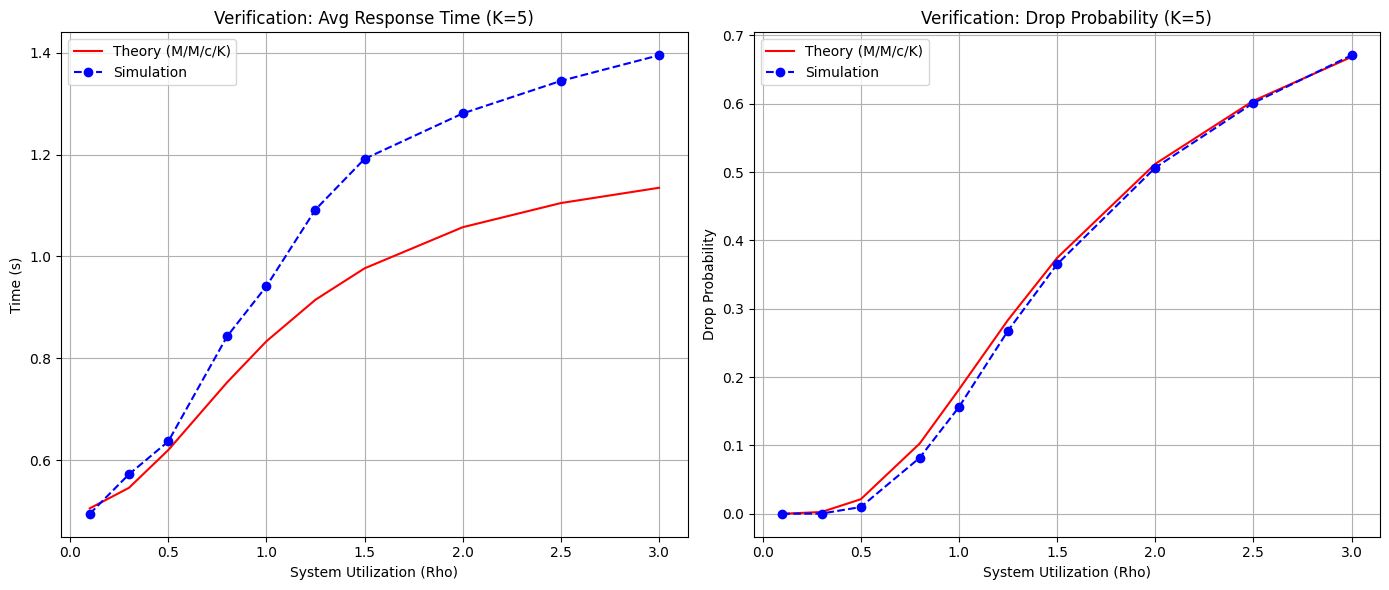

Generated 102 scenarios. Running simulation (Refactored Implementation)...

FACTOR SENSITIVITY ANALYSIS (Comparison against ALL 102 Scenarios)
Criterion: > 5% Difference in Done Rate

>>> SCANNING FACTOR: HW
Base ID  Configuration (Base)                                    | Max Delta  Counterpart (Match)
------------------------------------------------------------------------------------------------------------------------
S011     Weak Light Large Skew Skew                              | +8.4       vs S052 (Mixed)
S013     Weak Heavy Large Skew Balance                           | +89.0      vs S091 (Strong)
S014     Weak Heavy Large Skew Skew                              | +88.6      vs S092 (Strong)
S015     Weak Heavy Large Balance Skew                           | +91.7      vs S093 (Strong)
S016     Weak Heavy Large Balance Balance                        | +96.4      vs S094 (Strong)
S017     Weak Heavy Medium Balance Balance                       | +96.5      vs S095 (Strong)
S018

/tmp/ipython-input-4154533757.py:507: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=x_labels, patch_artist=True, showfliers=False,



Chart saved to Phase2_Final_Prototype_Aligned.png


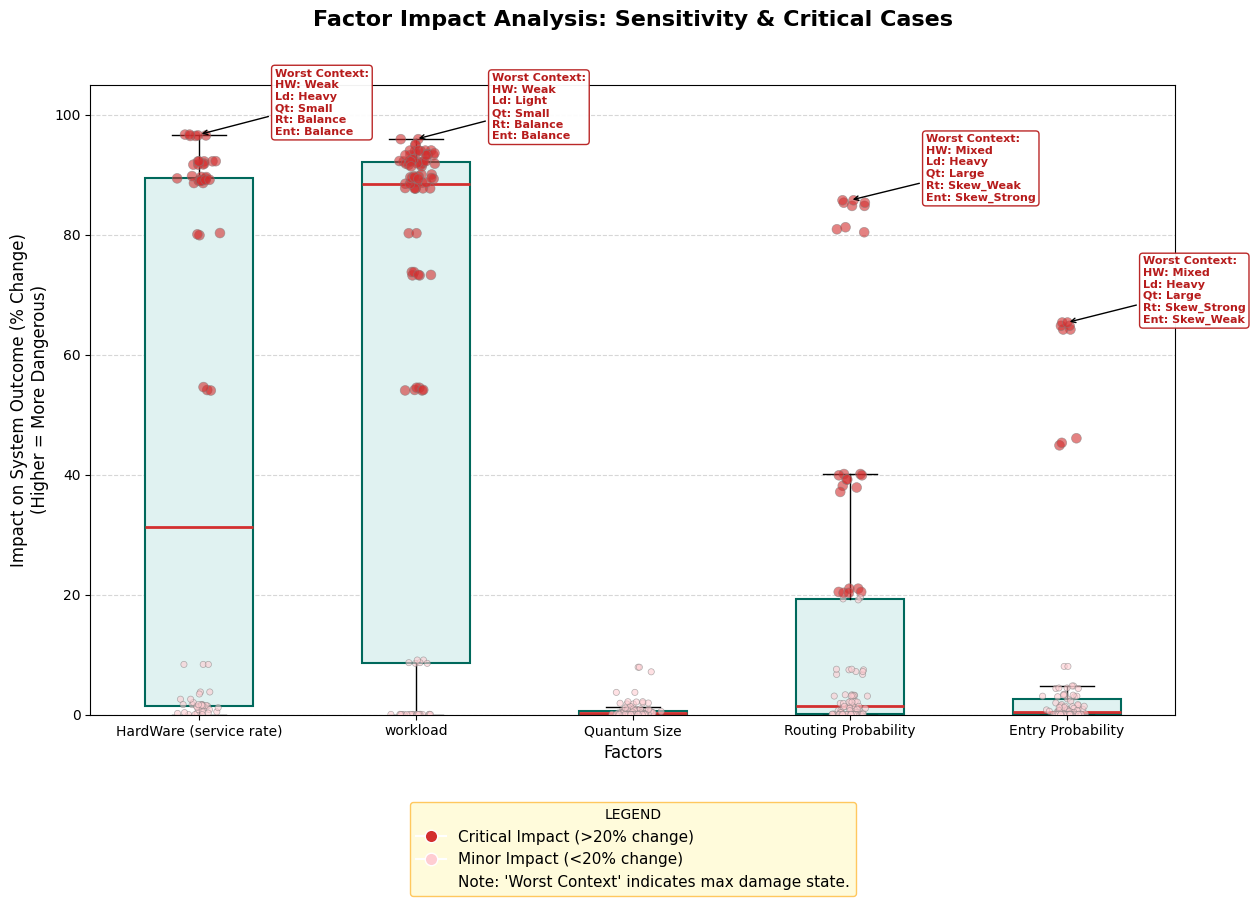

In [ ]:
# @title
# ==========================================
# 0. CONFIGURATION & CONSTANTS
# ==========================================
HARDWARE_LEVELS = {
    'Weak':   {'Render': {'c': 1, 'mu': 0.5}, 'AI': {'c': 1, 'mu': 0.5}, 'Sound': {'c': 1, 'mu': 0.5}},
    'Mixed':  {'Render': {'c': 4, 'mu': 4.0}, 'AI': {'c': 1, 'mu': 0.5}, 'Sound': {'c': 1, 'mu': 0.5}},
    'Strong': {'Render': {'c': 4, 'mu': 4.0}, 'AI': {'c': 4, 'mu': 4.0}, 'Sound': {'c': 4, 'mu': 4.0}}
}
QUANTUM_LEVELS = {'Small': [1, 2, 4], 'Medium': [4, 8, 16], 'Large': [20, 40, 80]}
ENTRY_LEVELS = {
    'Balance':     {'Render': 0.34, 'AI': 0.33, 'Sound': 0.33},
    'Skew_Weak':   {'Render': 0.10, 'AI': 0.45, 'Sound': 0.45},
    'Skew_Strong': {'Render': 0.90, 'AI': 0.05, 'Sound': 0.05},
    'Skew':        {'Render': 0.90, 'AI': 0.05, 'Sound': 0.05}
}
ROUTING_LEVELS = {
    'Balance': {'Render': {'AI': 0.5, 'Sound': 0.5}, 'AI': {'Render': 0.5, 'Sound': 0.5}, 'Sound': {'Render': 0.5, 'AI': 0.5}},
    'Skew_Weak': {'Render': {'AI': 0.5, 'Sound': 0.5}, 'AI': {'Sound': 0.8}, 'Sound': {'AI': 0.8}},
    'Skew_Strong': {'Render': {'AI': 0.1, 'Sound': 0.1}, 'AI': {'Render': 0.9}, 'Sound': {'Render': 0.9}},
    'Skew': {'Render': {'AI': 0.1, 'Sound': 0.1}, 'AI': {'Render': 0.9}, 'Sound': {'Render': 0.9}}
}
WORKLOAD_LEVELS = {'Light': 0.5, 'Heavy': 5.0}

# ==========================================
# ANALYTICAL HELPERS
# ==========================================
def mean_ci_95(data: List[float]) -> Tuple[float, float, float]:
    """Compute sample mean and approximate 95% confidence interval."""
    if not data: return 0.0, 0.0, 0.0
    mean = statistics.mean(data)
    if len(data) < 2: return mean, mean, mean
    stdev = statistics.stdev(data)
    n = len(data)
    se = stdev / (n ** 0.5)
    margin = 1.96 * se
    return mean, mean - margin, mean + margin

def MMcK_metrics(arrival_rate: float, service_rate: float, m: int, K: int) -> dict:
    """
    Compute theoretical metrics for M/M/c/K queue model.
    m: number of servers (c)
    K: system capacity (buffer + service slots)
    """
    # K must be greater than or equal to m
    if K is not None and K < m:
        return None

    rho = arrival_rate / (m * service_rate)

    # 1. Compute P0 (Probability of empty system)
    if rho == 1.0:
        # Special case where rho = 1
        # Sum of the first part: sum((m^k)/k!)
        part1 = sum((m**k) / math.factorial(k) for k in range(m))
        # Tail part for M/M/m/K when rho=1: (m^m / m!) * (K - m + 1)
        part2 = ((m**m) / math.factorial(m)) * (K - m + 1)
        p0 = 1.0 / (part1 + part2)
    else:
        # Sum of the first part (same as M/M/c)
        part1 = sum(((m * rho)**k) / math.factorial(k) for k in range(m))
        # Finite tail: using finite geometric series formula
        term_m = ((m * rho)**m) / math.factorial(m)
        geometric_sum = (1 - rho**(K - m + 1)) / (1 - rho)
        p0 = 1.0 / (part1 + term_m * geometric_sum)

    # 2. Compute P_K (Probability system is full -> Drop Rate)
    # Formula: P_n = P0 * (rho^n * m^m) / m! for n >= m
    if K < m:
        pK = 0
    else:
        pK = p0 * (rho**K) * (m**m) / math.factorial(m)

    # 3. Compute L (Average number of items in the system)
    L = 0.0
    for n in range(K + 1):
        if n < m:
            pn = p0 * ((m * rho)**n) / math.factorial(n)
        else:
            pn = p0 * (rho**n) * (m**m) / math.factorial(m)
        L += n * pn

    # 4. Apply Little's Law for finite system: L = lambda_eff * W
    # Effective arrival rate (lambda_eff) = lambda * (1 - P_drop)
    # Only counts tasks actually admitted to the system
    lam_eff = arrival_rate * (1 - pK)

    # Average Response Time (W)
    W = L / lam_eff if lam_eff > 0 else 0.0

    return {'rho': rho, 'W': W, 'P_drop': pK, 'Throughput': lam_eff}

# ==========================================
# TASK OBJECT
# ==========================================
class Task:
    __slots__ = ('id', 'arrival_time', 'remaining', 'total_service',
                 'level', 'last_enqueue_time', 'visits', 'path')

    def __init__(self, tid, arrival_time):
        self.id = tid
        self.arrival_time = arrival_time
        self.remaining = 0.0
        self.total_service = 0.0
        self.level = 0
        self.last_enqueue_time = arrival_time
        self.visits = 0
        self.path = [] # Tracking path for loop prevention

# ==========================================
# MODULE-LEVEL MLFQ
# ==========================================
class MLFQSystem:
    def __init__(self, name: str, env: simpy.Environment,
                 arrival_rate: float, service_rate: float, cpu_cores: int,
                 num_levels: int = 3, quantums: list = None,
                 max_system_size: int = None, network=None):
        self.name = name
        self.env = env
        self.mu = service_rate
        self.c = int(cpu_cores)
        self.k = max_system_size
        self.quantums = quantums if quantums else [10]*num_levels
        self.network = network

        # Resource: CPU Core Pool
        self.cpu = simpy.Store(env, capacity=self.c)
        for _ in range(self.c): self.cpu.put(1)

        # Queues per level
        self.queues = [deque() for _ in range(len(self.quantums))]

        # Start Dispatcher Process
        self.env.process(self.dispatcher())

    def get_current_size(self):
        running = self.c - len(self.cpu.items)
        waiting = sum(len(q) for q in self.queues)
        return running + waiting

    def handle_arrival(self, task: Task, service_time: float) -> bool:
        """Handles incoming task, checks capacity, and enqueues."""
        if self.k is not None and self.get_current_size() >= self.k:
            return False # Rejected

        task.remaining = service_time
        task.total_service = service_time
        task.level = 0 # Always start at highest priority
        task.path.append(self.name)
        task.last_enqueue_time = self.env.now

        self.queues[0].append(task)
        return True

    def dispatcher(self):
        """Continuously assigns ready tasks to available CPU cores."""
        while True:
            task = None
            lvl = -1
            # Scan queues from highest priority (0) to lowest
            for i in range(len(self.queues)):
                if self.queues[i]:
                    task = self.queues[i].popleft()
                    lvl = i
                    break

            if task:
                # Wait for a CPU core
                token = yield self.cpu.get()
                # Execute CPU Slice
                self.env.process(self.cpu_slice(token, task, lvl))
            else:
                yield self.env.timeout(0.01) # Idle wait

    def cpu_slice(self, token, task: Task, lvl: int):
        """Execute one CPU time slice."""
        q_val = self.quantums[lvl]
        run_t = min(task.remaining, q_val)

        yield self.env.timeout(run_t)

        task.remaining -= run_t
        task.visits += 1

        # Return CPU token
        yield self.cpu.put(token)

        if task.remaining <= 1e-6:
            # Job Completed in this module -> Route to next
            self.network.route_on_completion(task, self.name)
        else:
            # Demote or keep in lowest queue
            next_lvl = min(lvl + 1, len(self.quantums) - 1)
            task.level = next_lvl
            task.last_enqueue_time = self.env.now
            self.queues[next_lvl].append(task)

# ==========================================
# NETWORK-LEVEL ORCHESTRATION
# ==========================================
class NetworkSimulator:
    def __init__(self, config):
        self.env = simpy.Environment()
        self.cfg = config
        self.modules = {}
        self.finished_tasks = []
        self.response_times = []
        self.dropped_tasks = 0
        self.gen_count = 0

        # Build System
        for name, props in config['hw_config'].items():
            self.add_module(
                name=name,
                arrival_rate=0, # Controlled by global generator for this experiment
                service_rate=props['mu'],
                cpu_cores=props['c'],
                quantums=config['quantums'],
                max_system_size=config['K_limit']
            )

        # Start Global Traffic Generator (Simulating External Arrivals)
        self.env.process(self.global_generator())

    def add_module(self, name, arrival_rate, service_rate, cpu_cores, quantums, max_system_size):
        m = MLFQSystem(name, self.env, arrival_rate, service_rate, cpu_cores,
                       quantums=quantums, max_system_size=max_system_size, network=self)
        self.modules[name] = m
        return m

    def global_generator(self):
        """Simulates external arrivals based on Workload and Entry Probabilities."""
        rate = self.cfg['workload_val']
        entry_probs = self.cfg['entry_probs']

        while self.env.now < self.cfg['duration']:
            yield self.env.timeout(random.expovariate(rate))
            self.gen_count += 1
            task = Task(self.gen_count, self.env.now)

            # Select Entry Module
            r = random.random()
            cum = 0
            target = None
            for node, prob in entry_probs.items():
                cum += prob
                if r <= cum: target = node; break

            if target:
                self.send_to_module(task, target)

    def send_to_module(self, task, module_name):
        mu = self.modules[module_name].mu
        svc = random.expovariate(mu)
        if not self.modules[module_name].handle_arrival(task, svc):
            self.dropped_tasks += 1

    def route_on_completion(self, task, from_module):
        """Routing logic: determine next module or exit."""
        raw_routing = self.cfg['routing'].get(from_module, {})
        # Loop Prevention: Don't go back to modules already in path
        valid_destinations = {d: p for d, p in raw_routing.items() if d not in task.path}

        next_node = None
        if valid_destinations:
            r = random.random()
            cum = 0
            for dest, prob in valid_destinations.items():
                cum += prob
                if r <= cum: next_node = dest; break

        if next_node:
            self.send_to_module(task, next_node)
        else:
            self.finished_tasks.append(task)
            resp_time = self.env.now - task.arrival_time
            self.response_times.append(resp_time)

    def get_outcomes(self):
        done = len(self.finished_tasks)
        dropped = self.dropped_tasks
        total = max(1, self.gen_count)
        return {
            'ID': self.cfg['id'],
            'keys': self.cfg['keys'],
            'HW': self.cfg['keys']['hw'],
            'Ld': self.cfg['keys']['ld'],
            'Qt': self.cfg['keys']['qt'],
            'Rt': self.cfg['keys']['rt'],
            'Ent': self.cfg['keys']['ent'],
            'Done_Pct': (done / total) * 100,
            'Dropped_Pct': (dropped / total) * 100
        }

# ==========================================
# SNAKE GENERATION HELPERS
# ==========================================
def generate_snake(lists_of_levels):
    if len(lists_of_levels) == 1: return [[item] for item in lists_of_levels[0]]
    head, tail = lists_of_levels[0], lists_of_levels[1:]; result = []
    for i, h in enumerate(head):
        t_comb = generate_snake(tail)
        if i % 2 == 1: t_comb.reverse()
        for t in t_comb: result.append([h] + t)
    return result

def align_list(target, standard):
    if target == 'Skew' and 'Skew_Strong' in standard: target = 'Skew_Strong'
    elif target == 'Skew_Strong' and 'Skew' in standard: target = 'Skew'
    if target == standard[0]: return list(standard)
    if target == standard[-1]: return list(reversed(standard))
    idx = standard.index(target); return standard[idx:] + list(reversed(standard[:idx]))

def run_task(params):
    sim = NetworkSimulator(params) # Use the new class name
    sim.env.run(until=params['duration'])
    return sim.get_outcomes()

# ==========================================
# FINAL ANALYSIS & VISUALIZATION
# ==========================================
def run_verification():
    print("\n" + "="*80)
    print("RUNNING ANALYTICAL VERIFICATION (M/M/c/K)")
    print("Target: Compare Simulation vs Theory for Avg Response Time (W) & Drop Rate")
    print("="*80)

    # Verification Configuration
    VERIFY_MU = 2.0     # Service Rate
    VERIFY_C = 2        # Number of Cores
    VERIFY_K = 5        # Small K to easily observe Drop Rate
    DURATION = 5000     # Long duration for data convergence

    # Important: Huge Quantum to eliminate Feedback behavior (Context Switch overhead),
    # making it approximate FCFS to match the standard M/M/c/K formula.
    HUGE_QUANTUM = [999999]

    # Load levels (Lambda) to test
    # Lambda = rho * c * mu. Test from rho=0.2 to rho=3.0 (Overload)
    lambdas = [0.4, 1.2, 2.0, 3.2, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0]

    results_sim_w, results_theo_w = [], []
    results_sim_drop, results_theo_drop = [], []
    x_axis = []

    print(f"{'Load':<6} | {'Sim W':<8} {'Theo W':<8} | {'Sim Drop%':<10} {'Theo Drop%'}")
    print("-" * 60)

    for lam in lambdas:
        # 1. Compute Theoretical (Analytical)
        theo = MMcK_metrics(lam, VERIFY_MU, VERIFY_C, VERIFY_K)

        # 2. Run Simulation
        # Create config for a single node
        verify_cfg = {
            'id': 'Verify',
            'keys': {'hw':'Verify', 'ld':'Verify', 'qt':'Verify', 'rt':'Verify', 'ent':'Verify'},
            'hw_config': {'TestNode': {'c': VERIFY_C, 'mu': VERIFY_MU}},
            'quantums': HUGE_QUANTUM,        # Huge Quantum
            'entry_probs': {'TestNode': 1.0}, # 100% entry to this node
            'routing': {},                   # No further routing -> Exit
            'workload_val': lam,             # Varying Lambda
            'K_limit': VERIFY_K,             # K limit
            'duration': DURATION
        }

        sim = NetworkSimulator(verify_cfg)
        sim.env.run(until=DURATION)

        # 3. Collect Results
        # Average Response Time
        if sim.response_times:
            sim_w = statistics.mean(sim.response_times)
        else:
            sim_w = 0

        # Drop Rate %
        total_gen = max(1, sim.gen_count)
        sim_drop_pct = sim.dropped_tasks / total_gen

        # Store for plotting
        x_axis.append(theo['rho'])
        results_sim_w.append(sim_w)
        results_theo_w.append(theo['W'])
        results_sim_drop.append(sim_drop_pct)
        results_theo_drop.append(theo['P_drop'])

        print(f"{theo['rho']:<6.2f} | {sim_w:<8.4f} {theo['W']:<8.4f} | {sim_drop_pct:<10.2%} {theo['P_drop']:<6.2%}")

    # 4. Plot comparison charts
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Chart 1: Response Time
    ax1.plot(x_axis, results_theo_w, 'r-', label='Theory (M/M/c/K)')
    ax1.plot(x_axis, results_sim_w, 'bo--', label='Simulation')
    ax1.set_title(f'Verification: Avg Response Time (K={VERIFY_K})')
    ax1.set_xlabel('System Utilization (Rho)')
    ax1.set_ylabel('Time (s)')
    ax1.legend()
    ax1.grid(True)

    # Chart 2: Drop Rate
    ax2.plot(x_axis, results_theo_drop, 'r-', label='Theory (M/M/c/K)')
    ax2.plot(x_axis, results_sim_drop, 'bo--', label='Simulation')
    ax2.set_title(f'Verification: Drop Probability (K={VERIFY_K})')
    ax2.set_xlabel('System Utilization (Rho)')
    ax2.set_ylabel('Drop Probability')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.savefig('Verification_Result.png')
    print("\nVerification Chart saved to 'Verification_Result.png'")
    plt.show()

def run_analysis():
    # 1. Generate Data
    scenarios = []
    DURATION = 3000; K_LIMIT = 100

    def add_s(hw, ld, qt, rt, ent):
        scenarios.append({
            'id': f"S{len(scenarios)+1:03d}",
            'keys': {'hw': hw, 'qt': qt, 'rt': rt, 'ent': ent, 'ld': ld},
            'hw_config': HARDWARE_LEVELS[hw], 'quantums': QUANTUM_LEVELS[qt],
            'routing': ROUTING_LEVELS[rt], 'entry_probs': ENTRY_LEVELS[ent],
            'workload_val': WORKLOAD_LEVELS[ld], 'K_limit': K_LIMIT, 'duration': DURATION
        })

    # Snake Generation Logic
    for c in generate_snake([['Light', 'Heavy'], ['Small', 'Medium', 'Large'], ['Balance', 'Skew'], ['Balance', 'Skew']]): add_s('Weak', *c)
    last_weak = scenarios[-1]['keys']
    mix_args = [align_list(last_weak['ld'], ['Light', 'Heavy']), align_list(last_weak['qt'], ['Small', 'Medium', 'Large']), align_list(last_weak['rt'], ['Skew_Strong', 'Skew_Weak', 'Balance']), align_list(last_weak['ent'], ['Skew_Strong', 'Skew_Weak', 'Balance'])]
    for c in generate_snake(mix_args): add_s('Mixed', *c)
    last_mix = scenarios[-1]['keys']
    str_args = [align_list(last_mix['ld'], ['Light', 'Heavy']), align_list(last_mix['qt'], ['Small', 'Medium', 'Large']), align_list(last_mix['rt'], ['Balance', 'Skew']), align_list(last_mix['ent'], ['Balance', 'Skew'])]
    for c in generate_snake(str_args): add_s('Strong', *c)

    print(f"Generated {len(scenarios)} scenarios. Running simulation (Refactored Implementation)...")
    with concurrent.futures.ProcessPoolExecutor() as executor: results = list(executor.map(run_task, scenarios))
    df = pd.DataFrame(results)

    # Normalization
    for col in ['Rt', 'Ent']: df[f'norm_{col}'] = df[col].replace({'Skew': 'SKEW_FOCUS', 'Skew_Strong': 'SKEW_FOCUS'})

    # 2. ANALYSIS & LOGGING
    factors_to_scan = ['HW', 'Ld', 'Qt', 'Rt', 'Ent']
    col_map = {'HW': 'HW', 'Ld': 'Ld', 'Qt': 'Qt', 'Rt': 'norm_Rt', 'Ent': 'norm_Ent'}
    plot_data = {}

    print("\n" + "="*120)
    print("FACTOR SENSITIVITY ANALYSIS (Comparison against ALL 102 Scenarios)")
    print("Criterion: > 5% Difference in Done Rate")
    print("="*120)

    for factor in factors_to_scan:
        deltas = []; max_delta_global = 0; worst_case_desc = ""; count_significant = 0
        print(f"\n>>> SCANNING FACTOR: {factor}")
        print(f"{'Base ID':<8} {'Configuration (Base)':<55} | {'Max Delta':<10} {'Counterpart (Match)'}")
        print("-" * 120)

        for i, row in df.iterrows():
            query_parts = []
            for f_check in factors_to_scan:
                if f_check == factor: continue
                col_name = col_map[f_check]
                val = row[col_name] if col_name in row else row[f_check]
                if col_name not in df.columns: query_parts.append(f"`{col_name}` == '{val}'")
                else: query_parts.append(f"`{col_name}` == '{val}'")

            matches = df.query(" & ".join(query_parts))
            current_target_val = row[col_map[factor]] if col_map[factor] in df.columns else row[factor]

            if factor in ['Rt', 'Ent']: counterparts = matches[matches[col_map[factor]] != current_target_val]
            else: counterparts = matches[matches[factor] != row[factor]]

            if counterparts.empty: continue

            local_max_delta = 0.0; best_match_id = ""; best_match_val = ""
            for _, match in counterparts.iterrows():
                delta = match['Done_Pct'] - row['Done_Pct']
                if abs(delta) > abs(local_max_delta):
                    local_max_delta = delta; best_match_id = match['ID']; best_match_val = match[factor]

            deltas.append(abs(local_max_delta))

            if abs(local_max_delta) > max_delta_global:
                max_delta_global = abs(local_max_delta)
                worst_case_desc = f"Worst Context:\nHW: {row['HW']}\nLd: {row['Ld']}\nQt: {row['Qt']}\nRt: {row['Rt']}\nEnt: {row['Ent']}"

            if abs(local_max_delta) > 5.0:
                count_significant += 1
                cfg_str = f"{row['HW']} {row['Ld']} {row['Qt']} {row['Rt']} {row['Ent']}"
                print(f"{row['ID']:<8} {cfg_str:<55} | {local_max_delta:<+10.1f} vs {best_match_id} ({best_match_val})")

        if count_significant == 0: print(f"(No significant impact > 5% found for {factor})")
        plot_data[factor] = {'values': deltas, 'max_desc': worst_case_desc, 'max_val': max_delta_global}

    # 3. VISUALIZATION
    plt.figure(figsize=(14, 10))
    plt.subplots_adjust(bottom=0.25)

    # Custom Labels as requested
    x_labels = ['HardWare (service rate)', 'workload', 'Quantum Size', 'Routing Probability', 'Entry Probability']
    box_data = [plot_data[f]['values'] for f in factors_to_scan]

    plt.boxplot(box_data, labels=x_labels, patch_artist=True, showfliers=False,
                boxprops=dict(facecolor='#e0f2f1', color='#00695c', linewidth=1.5),
                medianprops=dict(color='#d32f2f', linewidth=2))

    for i, factor in enumerate(factors_to_scan):
        vals = plot_data[factor]['values']
        if not vals: continue
        x_jitter = np.random.normal(i + 1, 0.04, size=len(vals))
        colors = ['#ffcdd2' if v < 20 else '#d32f2f' for v in vals]
        sizes = [20 if v < 20 else 50 for v in vals]

        plt.scatter(x_jitter, vals, alpha=0.6, c=colors, s=sizes, edgecolors='gray', linewidth=0.5, zorder=3)
        max_v = plot_data[factor]['max_val']
        if max_v > 10:
            plt.annotate(plot_data[factor]['max_desc'], xy=(i+1, max_v), xytext=(i+1.35, max_v),
                         arrowprops=dict(arrowstyle="->", color='black'), fontsize=8, fontweight='bold', color='#b71c1c',
                         bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#b71c1c", alpha=0.95))

    plt.title('Factor Impact Analysis: Sensitivity & Critical Cases', fontsize=16, fontweight='bold', y=1.08)
    plt.ylabel('Impact on System Outcome (% Change)\n(Higher = More Dangerous)', fontsize=12)
    plt.xlabel('Factors', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5, axis='y')
    plt.ylim(0, 105)

    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Critical Impact (>20% change)', markerfacecolor='#d32f2f', markersize=9),
        Line2D([0], [0], marker='o', color='w', label='Minor Impact (<20% change)', markerfacecolor='#ffcdd2', markersize=9),
        Line2D([0], [0], marker='', color='none', label="Note: 'Worst Context' indicates max damage state.")
    ]
    leg = plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=1, frameon=True, fontsize=11, title="LEGEND")
    leg.get_frame().set_facecolor('#fff9c4'); leg.get_frame().set_edgecolor('orange'); leg.get_frame().set_alpha(0.6)

    plt.savefig('Phase2_Final_Prototype_Aligned.png', bbox_inches='tight', dpi=150)
    print("\nChart saved to Phase2_Final_Prototype_Aligned.png")
    plt.show()

if __name__ == "__main__":
    run_verification()
    run_analysis()

**Observations:**

1.  **The Dominance of Capacity Factors:** *Hardware* and *Workload* are unequivocally the most critical determinants of system success. Both factors exhibit a massive spread (Variance), with impacts ranging from negligible (0%) to catastrophic (>90%).
2.  **The Quantum Paradox:** Despite being a key focus in Phase 1, **Quantum Size** shows negligible impact on the *Done Rate* in Phase 2 (Impact < 5%). The box is compressed entirely at the bottom of the chart.
3.  **Context-Dependent Traffic Impact:** *Routing* and *Entry Probability* show a low median impact (mostly < 20%, denoted by light pink dots) but possess significant outliers (dark red dots reaching 80%). This indicates they are usually safe but become critical risks in specific contexts.

**Interpretation:**

* **Binary Capacity States:** The high impact of Hardware and Workload is explained by the binary nature of system stability.
    * When switching from *Light* to *Heavy* Load (or *Strong* to *Weak* Hardware), the system transitions from an under-utilized state (100% Done) to a saturated state (Drop Rate spikes). This transition causes the massive 90% swing observed in the chart.

* **Why Quantum Size doesn't affect Done Rate:** While Phase 1 proved that Quantum Size affects *Fairness* and *Latency*, Phase 2 reveals it does *not* affect the system's ability to complete jobs (Throughput). MLFQ is a work-conserving scheduler; unless the overhead is extreme, the CPU spends the same amount of time processing instructions regardless of the slice size. Thus, the total number of completed jobs remains constant.

* **The "Mixed Hardware" Trap:** The outliers in Routing Probability (marked as "Worst Context: HW Mixed") highlight a critical interaction.
    * In a Homogeneous system (all Weak or all Strong), routing doesn't matter because all nodes are equal.
    * In a **Mixed** system, routing becomes decisive. Directing traffic to a Weak node causes a bottleneck (High Impact), while directing it to a Strong node relieves pressure. This proves that *Load Balancing* is only effective when resource asymmetry exists.

**Conclusion:**

The system's performance hierarchy is established as follows:

1.  **Critical Tier (Hardware, Workload):** These define the physical upper bound of performance. No scheduling policy can save a system that lacks raw capacity.
2.  **Strategic Tier (Routing, Entry):** These are force multipliers. They are critical specifically in **Heterogeneous (Mixed)** environments to prevent bottlenecks.
3.  **Optimization Tier (Quantum Size):** This parameter is strictly for optimizing User Experience (Fairness/Latency) and does not contribute to the system's survival (Throughput/Drop Rate).

# 9. Conclusions


### **9.1 Achieved Results**


This project successfully implemented and evaluated a discrete-event simulation of a Multi-Level Feedback Queue (MLFQ) network. By adopting a 2-phase experimental design (Screening followed by Full Factorial), we established a comprehensive understanding of the system's behavior across both micro (single module) and macro (network) levels.

**1. Verification:**

We achieved a high degree of correspondence between our simulation results and theoretical analytical models.

* At the **Module Level**, the queueing behavior under varying capacities ($K$) aligned perfectly with the $M/M/c/K$ finite queue formulas, confirming the correctness of the simulation kernel.
* At the **System Level**, the flow dynamics satisfied Little's Law and Flow Balance equations, validating the routing logic.

**2. Performance Trends:**

* **Stability Threshold:** We identified that Queue Capacity ($K$) exhibits a saturation point (approx. $K=100$). Beyond this threshold, increasing buffer size yields diminishing returns on stability and primarily increases average waiting time without reducing drop rates effectively.
* **The Fairness-Overhead Trade-off:** Our analysis revealed a critical trade-off in Quantum sizing. While smaller quantums theoretically favor responsiveness, they incur significant Context Switch overhead. In a networked environment, larger quantums were found to improve global Fairness (Jain's Index $> 0.5$) by allowing tasks to traverse nodes more efficiently.
* **Factor Hierarchy:** The sensitivity analysis established a clear hierarchy of impact: Hardware and Workload are the dominant factors determining system survival (Done Rate), whereas Routing and Quantum policies play a strategic role in optimization and user experience.


### **9.2 System Limitations**


Despite the robust findings, the current system model exhibits certain constraints:

* **Scalability Limits:** While adding CPU cores ($c=1 \to 4$) improves throughput, the system remains strictly bound by the arrival-to-service rate ratio ($\lambda / c\mu$). The scheduler (MLFQ) cannot compensate for a fundamental lack of physical capacity; under heavy overload ($\rho > 1.0$), packet loss is inevitable regardless of the scheduling policy.
* **Context Switch Overhead:** The simulation assumes a simplified overhead model. In real-world scenarios, the penalty for context switching (cache trashing, TLB flushes) might be non-linear and more severe than the linear counter implemented, potentially making "Tiny" quantum policies even less viable.
* **Static Routing Inefficiency:** The current stochastic routing mechanism (fixed probabilities) is blind to the real-time state of the nodes. This leads to inefficient load distribution, especially in "Mixed Hardware" scenarios where tasks are blindly routed to weak nodes, causing avoidable bottlenecks.

### **9.3 Future Work**

To address these limitations and extend the applicability of the model, future research should focus on:

* **Adaptive MLFQ Policies:** Implementing a dynamic time quantum that adjusts based on real-time traffic load (e.g., increasing $Q$ during heavy load to reduce switching overhead).
* **Smart Load Balancing:** Replacing static routing probabilities with a "Join-Shortest-Queue" (JSQ) or "Least-Loaded" routing strategy. This would mitigate the bottlenecks observed in the Mixed Hardware scenarios.
* **Aging Mechanism:** Integrating a priority boosting (Aging) mechanism to prevent starvation of CPU-bound tasks in the lower queues, further improving the Fairness Index.
* **Real-Workload Traces:** Moving beyond synthetic Poisson/Exponential distributions to test the system against realistic trace files (e.g., from standard workload archives) to capture bursty and long-tail traffic behaviors.

# 10. References

- **SimPy Documentation:** [https://simpy.readthedocs.io/](https://simpy.readthedocs.io/)  

- **Kleinrock, L.** *Queueing Systems, Volume I: Theory*  

- **RSI Concepts**, "What are the Different Types of Queue Management System," [Online]. Available: https://www.rsiconcepts.com/blog/2021/04/what-are-the-different-types-of-queue-management-system/.